# Perfil comercial de um país

Perfil comercial de um país. O objetivo é analisar as trocas comerciais de um país com o resto do mundo.

Mais informação em [country_trade_profile_README.md](country_trade_profile_README.md)

## Setup

For instructions and how to obtain an API key, see [here](0-comtrade-setup-first.ipynb).

In [1]:
import logging
import sys

# Configure logging to output to stdout and set level to DEBUG
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

# Example info message
logging.info("This is an info message")
# Example debug message
logging.debug("This is a debug message")

INFO:root:This is an info message


In [2]:
import comtradetools as comtradetools

comtradetools.setup()
APIKEY = comtradetools.get_api_key()
comtradetools.init(APIKEY, force_init=False)


INFO:root:Loading HS codes from support/harmonized-system.csv


In [3]:
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format

## Country and period of interest

Choose country and years of interest

In [4]:
import comtradetools


country_of_interest_name = 'Equatorial Guinea'
country_of_interest = comtradetools.encode_country(country_of_interest_name)

years_of_interest=comtradetools.year_range(2003,2023)
print(country_of_interest_name, country_of_interest, years_of_interest)

Equatorial Guinea 226 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [5]:
from datetime import datetime

current_datetime = datetime.now()
print(f"Start run for {country_of_interest_name}:", current_datetime)

Start run for Equatorial Guinea: 2024-06-21 17:34:56.992338


## 1.Trade balance

### 1a Trade balance symmetric values

In [6]:
import comtradetools
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format

global_trade = comtradetools.get_trade_flows(country_of_interest,
                                        period=years_of_interest,
                                        period_size=1,  # how may years fetched in one call
                                        retry_if_empty=False,
                                        symmetric_values=True)

cols_of_interest = global_trade.columns



INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

In [8]:
global_trade['varM_perc']=global_trade['M<X']/global_trade['M<X']
global_trade['varX_perc']=global_trade['X<M']/global_trade['X<M']
print(f"M = Imports as reported by {country_of_interest_name}")
print(f"X = Exports as reported by {country_of_interest_name}")
print(f"X<M = Exports as reported by rest of the world imports from {country_of_interest_name}")
print(f"M<X = Imports as reported by rest of the world exports to {country_of_interest_name}")
global_trade


M = Imports as reported by Equatorial Guinea
X = Exports as reported by Equatorial Guinea
X<M = Exports as reported by rest of the world imports from Equatorial Guinea
M<X = Imports as reported by rest of the world exports to Equatorial Guinea


flowCode,M<X,X<M,trade_balance (X<M-M<X),trade_volume (X<M+M<X),varM_perc,varX_perc
period,,,,,,
2003,"1,078,629,613.36","2,742,819,503.01","1,664,189,889.65","3,821,449,116.37",1.00,1.00
2004,"700,056,876.30","4,291,635,620.68","3,591,578,744.38","4,991,692,496.98",1.00,1.00
2005,"1,035,248,466.62","6,628,318,107.32","5,593,069,640.70","7,663,566,573.95",1.00,1.00
2006,"1,498,577,121.10","8,444,959,810.83","6,946,382,689.74","9,943,536,931.93",1.00,1.00
2007,"1,428,472,645.27","9,475,040,661.89","8,046,568,016.61","10,903,513,307.16",1.00,1.00
2008,"1,717,449,643.66","16,064,218,733.06","14,346,769,089.40","17,781,668,376.72",1.00,1.00
2009,"5,317,687,746.91","9,189,028,053.71","3,871,340,306.80","14,506,715,800.61",1.00,1.00
2010,"5,116,075,559.27","9,609,962,928.26","4,493,887,368.99","14,726,038,487.53",1.00,1.00
2011,"3,426,974,681.31","13,317,787,216.19","9,890,812,534.89","16,744,761,897.50",1.00,1.00


Save to Excel file

In [9]:
start_year=global_trade.index.min()
end_year=global_trade.index.max()
excel_file = f"reports/{country_of_interest_name}_1.1_trade_balance_{start_year}-{end_year}.xlsx"
global_trade.to_excel(excel_file)
print("Trade ballance report saved to ", excel_file)

Trade ballance report saved to  reports/Equatorial Guinea_1.1_trade_balance_2003-2023.xlsx


### Trade balance graph

Plot saved to  reports/Equatorial Guinea_1.2_trade_balance_2003-2023.png
0 Line2D(M<X) 0.0
1 Line2D(X<M) 0.8
2 Line2D(trade_balance (X<M-M<X)) 0.0
3 Line2D(trade_volume (X<M+M<X)) 0.8


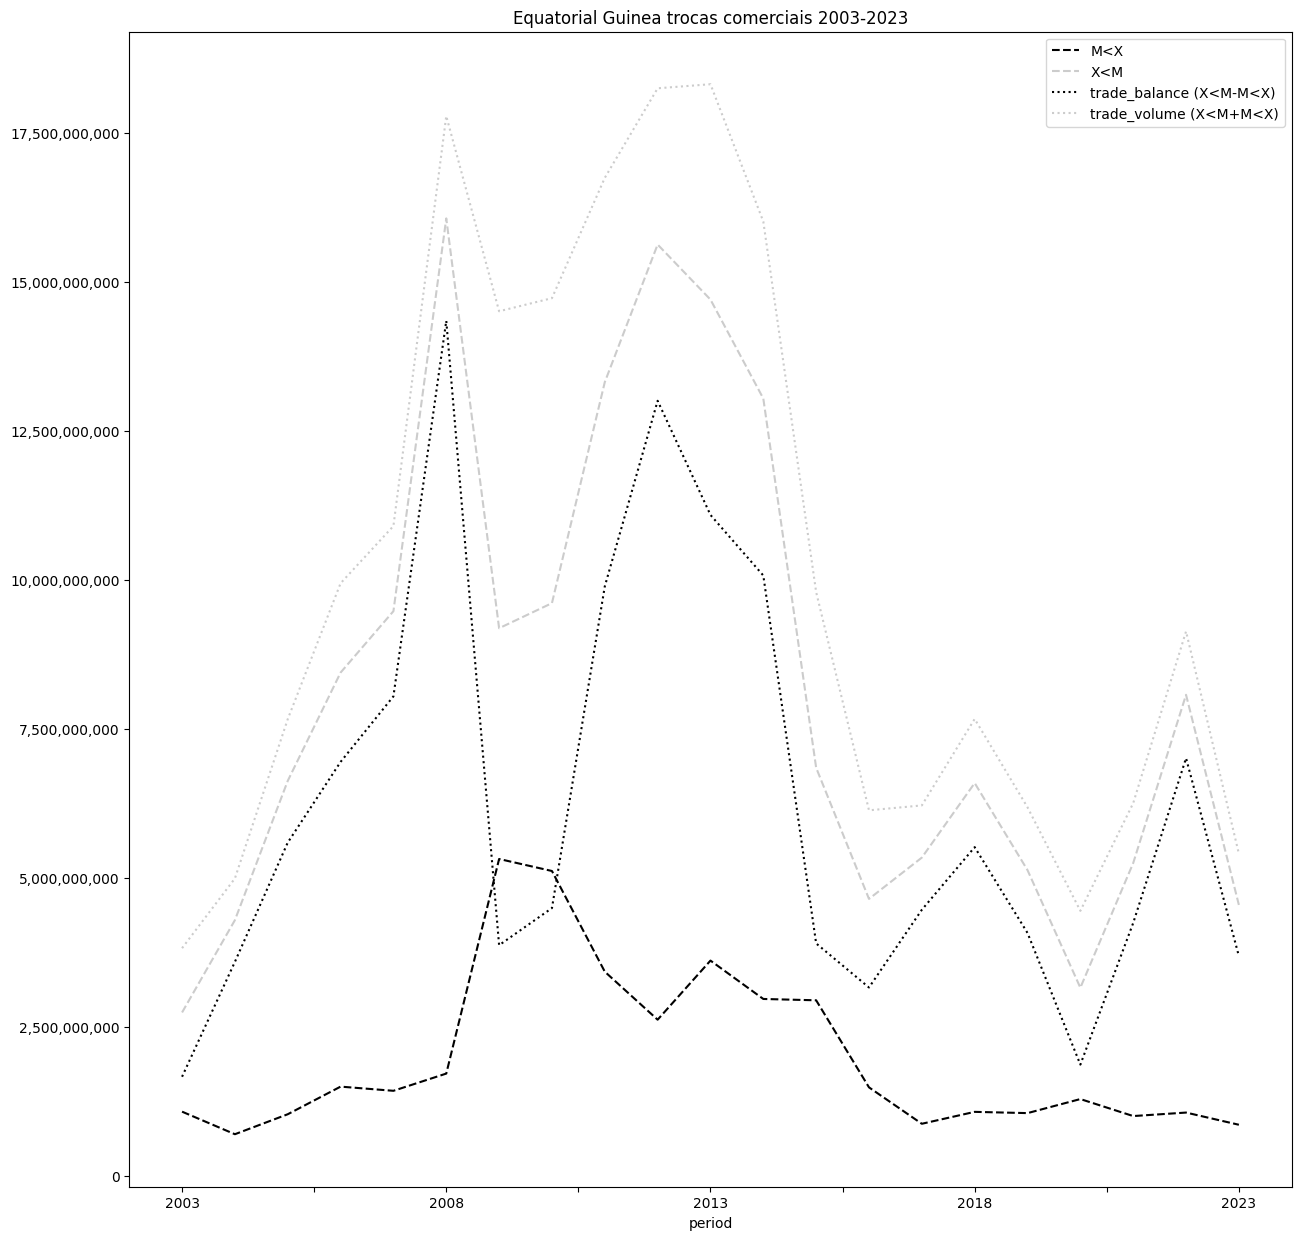

In [10]:
import logging

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
logging.basicConfig(level=logging.ERROR)

plotfile = f"reports/{country_of_interest_name}_1.2_trade_balance_{start_year}-{end_year}.png"

start_year=global_trade.index.min()
end_year=global_trade.index.max()
title=f"{country_of_interest_name} trocas comerciais {start_year}-{end_year}"
print("Plot saved to ", plotfile)
fig = global_trade[cols_of_interest].plot.line(figsize=(15,15),title=title)

# use a grayscale palette of colors
colors = ['0.0','0.8','0.0','0.8','0.0','0.8','0.0','0.8']

# use different line styles and black lines
linestyles = ['dashed', 'dashed', 'dotted', 'dotted', 'dashdot', 'dashdot', 'solid', 'solid']
for i, line in enumerate(fig.get_lines()):
    print(i, line, colors[i])
    line.set_color(colors[i])
    line.set_linestyle(linestyles[i % len(linestyles)])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig.yaxis.set_major_formatter(formatter)
fig.legend(list(global_trade.columns.astype(str)))

plt.savefig(plotfile)
plt.show()

## 2. Exports


### 2.1 Main export partners/clients

Colect destinations of exports of the country. 

Use either reported exports
of country of interest, or reported imports from country of interest by
all other countries (symmetric reporting). 

Set variable `symmetric_reporting` to choose.

In [13]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = True  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
    filename_symmetric_flag="reverse"
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'
    filename_symmetric_flag="direct"

In [14]:

df = comtradetools.getFinalData(APIKEY,
                                reporterCode=reporterCode,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode=flowCode,
                                period=years_of_interest,
                                period_size=1,
                                partnerCode=partnerCode,
                                remove_world=True,
                                partner2Code=0,  # world
                                clCode="HS",
                                cmdCode="TOTAL",
                                motCode=0,  # all means of transport
                                customsCode='C00', # all customs
                                includeDesc=True,
                                retry_if_empty=False,
                                cache=True
                                )

INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalData for period 2014
INFO:root:Calling getFinalData for period 2015
INFO:root:Calling getFinalData for period 2016
INFO:root:Calling getFinalData for period 2017
INFO:root:Calling getFinalData for period 2018
INFO:root:Calling getFinalData for period 2019
INFO:root:Calling getFinalData for period 2020
INFO:root:Calling getFinalData for period 2021
INFO:root:Calling getFinalData for period 2022
INFO:root:Calling getFinalData for period 2023


Compute percentage of trade and rank of partners for each year.

Use `show_only_top` to show only the top partners (e.g. 5).

In [ ]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5

# aggregate by year, flow, reporter
exports = comtradetools.total_rank_perc(df,groupby=['refYear','flowCode',f'{partner_column}Desc'],
                                    col='primaryValue',
                                    prefix='partner',
                                    drop_duplicates=True)

cols=['refYear','flowCode',f'{reporter_column}Desc','partner_rank',f'{partner_column}Desc','cmdCode','partner_sum','partner_perc','partner_upper_sum']

formats =  comtradetools.make_format(cols)

top_export_partners = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Desc'].unique()
top_export_partners_codes = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Code'].unique()

print(f"Top {show_only_top} export partners of {country_of_interest_name} in {years_of_interest}: \n{top_export_partners}")
exports[exports['partner_rank']<=show_only_top][cols].sort_values(['refYear','flowCode','partner_rank',f'{partner_column}Desc','cmdCode']).style.format(formats)

Top 5 export partners of Sao Tome and Principe in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023: 
['Belgium' 'France' 'Netherlands' 'Portugal' 'USA' 'Gabon' 'Angola'
 'Japan' 'Areas, nes' 'Norway' 'Spain' 'Türkiye' 'Germany' 'Free Zones'
 'Slovenia' 'Cameroon']


,refYear,flowCode,reporterDesc,partner_rank,partnerDesc,cmdCode,partner_sum,partner_perc,partner_upper_sum
7,2003,X,Sao Tome and Principe,1,Netherlands,TOTAL,"$2,568,398",38.745%,"$6,628,901"
9,2003,X,Sao Tome and Principe,2,Portugal,TOTAL,"$2,415,750",36.443%,"$6,628,901"
2,2003,X,Sao Tome and Principe,3,Belgium,TOTAL,"$995,681",15.020%,"$6,628,901"
4,2003,X,Sao Tome and Principe,4,France,TOTAL,"$256,443",3.869%,"$6,628,901"
12,2003,X,Sao Tome and Principe,5,USA,TOTAL,"$192,448",2.903%,"$6,628,901"
20,2004,X,Sao Tome and Principe,1,Netherlands,TOTAL,"$1,834,384",51.628%,"$3,553,082"
22,2004,X,Sao Tome and Principe,2,Portugal,TOTAL,"$910,414",25.623%,"$3,553,082"
15,2004,X,Sao Tome and Principe,3,Belgium,TOTAL,"$335,788",9.451%,"$3,553,082"
17,2004,X,Sao Tome and Principe,4,Gabon,TOTAL,"$148,353",4.175%,"$3,553,082"
16,2004,X,Sao Tome and Principe,5,France,TOTAL,"$86,317",2.429%,"$3,553,082"


Pivot the countries to columns, keeping the total value and percentage in separate columns.

----

Passamos os países para colunas, mantendo a percentagem e o valor em separado.

In [ ]:
pivoted = df.pivot_table(index=['refYear','flowDesc'], columns=f'{partner_column}Desc', values=['primaryValue','partner_perc'])
pivoted.swaplevel(axis=1).fillna(0,inplace=True)
pivoted.sort_index(axis=1, level=0, inplace=True)


Limit table to top_export_partners

Note that the number of top partners considered was set before with `show_only_top` (e.g. 5).

But each year the top partners may vary, so that the total number of partners for the period will be
more than `show_only_top`.

In [ ]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]
pivoted[show_only_columns].fillna(0)

partner_perc                                                \
partnerDesc            Angola Areas, nes Belgium Cameroon France Free Zones   
refYear flowDesc                                                              
2003    Export           0.02       0.00    0.15     0.00   0.04       0.00   
2004    Export           0.02       0.00    0.09     0.00   0.02       0.00   
2005    Export           0.04       0.00    0.11     0.00   0.02       0.00   
2006    Export           0.02       0.08    0.14     0.01   0.09       0.00   
2007    Export           0.34       0.01    0.10     0.00   0.10       0.00   
2008    Export           0.47       0.00    0.04     0.00   0.04       0.00   
2009    Export           0.24       0.05    0.14     0.01   0.02       0.00   
2010    Export           0.01       0.07    0.21     0.00   0.00       0.00   
2011    Export           0.08       0.39    0.16     0.00   0.02       0.00   
2012    Export           0.01       0.00    0.06     0.02   0.09       0.00   
2013    Export           0.04       0.00    0.21     0.00   0.12       0.00   
2014    Export           0.02       0.00    0.24     0.02   0.13       0.00   
2015    Export           0.02       0.00    0.25     0.00   0.05       0.00   
2016    Export           0.01       0.00    0.00     0.00   0.00       0.90   
2017    Export           0.02       0.00    0.14     0.00   0.16       0.00   
2018    Export           0.02       0.00    0.18     0.00   0.05       0.00   
2019    Export           0.01       0.91    0.01     0.00   0.00       0.00   
2020    Export           0.04       0.00    0.16     0.05   0.05       0.00   
2021    Export           0.00       0.00    0.21     0.04   0.01       0.00   
2022    Export           0.03       0.22    0.14     0.04   0.01       0.00   
2023    Export           0.00       0.00    0.21     0.02   0.02       0.00   

                                                  ... primaryValue  \
partnerDesc      Gabon Germany Japan Netherlands  ...        Gabon   
refYear flowDesc                                  ...                
2003    Export    0.00    0.00  0.00        0.39  ...    18,366.00   
2004    Export    0.04    0.00  0.00        0.52  ...   148,353.00   
2005    Export    0.00    0.01  0.02        0.39  ...    13,991.00   
2006    Export    0.00    0.00  0.00        0.27  ...    14,730.00   
2007    Export    0.01    0.00  0.00        0.08  ...    92,331.00   
2008    Export    0.01    0.00  0.00        0.15  ...   102,032.00   
2009    Export    0.00    0.00  0.00        0.21  ...    25,224.00   
2010    Export    0.00    0.00  0.00        0.16  ...    17,239.00   
2011    Export    0.01    0.02  0.00        0.20  ...    62,009.00   
2012    Export    0.01    0.03  0.00        0.43  ...    59,311.00   
2013    Export    0.01    0.04  0.00        0.29  ...    64,994.00   
2014    Export    0.00    0.07  0.00        0.21  ...    18,723.00   
2015    Export    0.01    0.04  0.00        0.36  ...    49,369.00   
2016    Export    0.00    0.04  0.00        0.02  ...    12,485.00   
2017    Export    0.00    0.06  0.00        0.30  ...    14,368.57   
2018    Export    0.00    0.09  0.00        0.38  ...     3,169.39   
2019    Export    0.00    0.00  0.00        0.02  ...     8,712.97   
2020    Export    0.01    0.09  0.00        0.47  ...    81,669.97   
2021    Export    0.01    0.09  0.00        0.45  ...   142,582.50   
2022    Export    0.00    0.03  0.00        0.39  ...    24,788.92   
2023    Export    0.00    0.03  0.00        0.60  ...    29,298.16   

                                                                              \
partnerDesc           Germany     Japan  Netherlands     Norway     Portugal   
refYear flowDesc                                                               
2003    Export           0.00 10,315.00 2,568,398.00       0.00 2,415,750.00   
2004    Export           0.00      0.00 1,834,384.00       0.00   910,414.00   
2005    Export      22,578.00 80,422.00

Make a table with the total value of exports for top partners in the period of interest

In [ ]:
print("Top partners for exports: ",top_export_partners)
print("Period of interest:",years_of_interest)

Top partners for exports:  ['Belgium' 'France' 'Netherlands' 'Portugal' 'USA' 'Gabon' 'Angola'
 'Japan' 'Areas, nes' 'Norway' 'Spain' 'Türkiye' 'Germany' 'Free Zones'
 'Slovenia' 'Cameroon']
Period of interest: 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [ ]:
import pandas as pd

# lets get just the value of imports from the top export partners
values_only = pivoted.loc[:,"primaryValue"]
values_only.reset_index(level=1, drop=True, inplace=True)
show_only_columns = [country for country in values_only.columns.tolist() if country in top_export_partners]
values_only=values_only[show_only_columns]
# sort columns by mean value
mean_values = values_only.mean().sort_values(ascending=False)
values_only = values_only[mean_values.index]
values_only

partnerDesc,Free Zones,Netherlands,Belgium,"Areas, nes",Portugal,Angola,Germany,Spain,France,Türkiye,Norway,Cameroon,Slovenia,USA,Gabon,Japan
refYear,,,,,,,,,,,,,,,,
2003,NaN,"2,568,398.00","995,681.00",NaN,"2,415,750.00","108,781.00",NaN,NaN,"256,443.00",NaN,NaN,53.00,NaN,"192,448.00","18,366.00","10,315.00"
2004,NaN,"1,834,384.00","335,788.00",1.00,"910,414.00","63,762.00",NaN,"68,692.00","86,317.00",NaN,NaN,NaN,NaN,NaN,"148,353.00",NaN
2005,NaN,"1,315,625.00","369,610.00","3,801.00","1,332,161.00","137,053.00","22,578.00",NaN,"63,159.00",NaN,NaN,NaN,NaN,NaN,"13,991.00","80,422.00"
2006,NaN,"1,044,054.00","551,613.00","319,636.00","1,294,746.00","60,480.00",NaN,NaN,"366,940.00",NaN,NaN,"56,390.00",NaN,3.00,"14,730.00",NaN
2007,NaN,"512,674.00","678,298.00","67,832.00","2,310,768.00","2,291,432.00",NaN,"20,057.00","682,042.00",NaN,NaN,NaN,NaN,NaN,"92,331.00",NaN
2008,NaN,"1,584,887.00","445,107.00","18,196.00","2,825,721.00","4,999,273.00",NaN,NaN,"385,346.00",NaN,NaN,"10,943.00",NaN,"11,287.00","102,032.00",NaN
2009,NaN,"1,672,103.00","1,174,773.00","406,287.00","2,053,514.00","1,920,086.00",NaN,NaN,"163,404.00",NaN,NaN,"41,233.00",NaN,NaN,"25,224.00",NaN
2010,NaN,"1,012,574.00","1,352,823.00","419,779.00","2,721,916.00","84,001.00","24,192.00","2,745.00","19,845.00",NaN,"294,054.00","7,668.00",NaN,"31,680.00","17,239.00",NaN
2011,NaN,"2,262,294.00","1,720,392.00","4,275,137.00","875,067.00","886,176.00","174,095.00","102,128.00","192,968.00",NaN,NaN,"44,463.00",NaN,"17,772.00","62,009.00",NaN


Plot saved to  reports/Sao Tome and Principe_2.1.4_export_2003-2023_direct.png
0 Line2D(_child0) #555555
1 Line2D(_child2) #666666
2 Line2D(_child4) #777777
3 Line2D(_child6) #888888
4 Line2D(_child8) #999999
5 Line2D(_child10) #AAAAAA
6 Line2D(_child12) #BBBBBB
7 Line2D(_child14) #CCCCCC
8 Line2D(_child16) #555555
9 Line2D(_child18) #666666
10 Line2D(_child20) #777777
11 Line2D(_child22) #888888
12 Line2D(_child24) #999999
13 Line2D(_child26) #AAAAAA
14 Line2D(_child28) #BBBBBB
15 Line2D(_child30) #CCCCCC


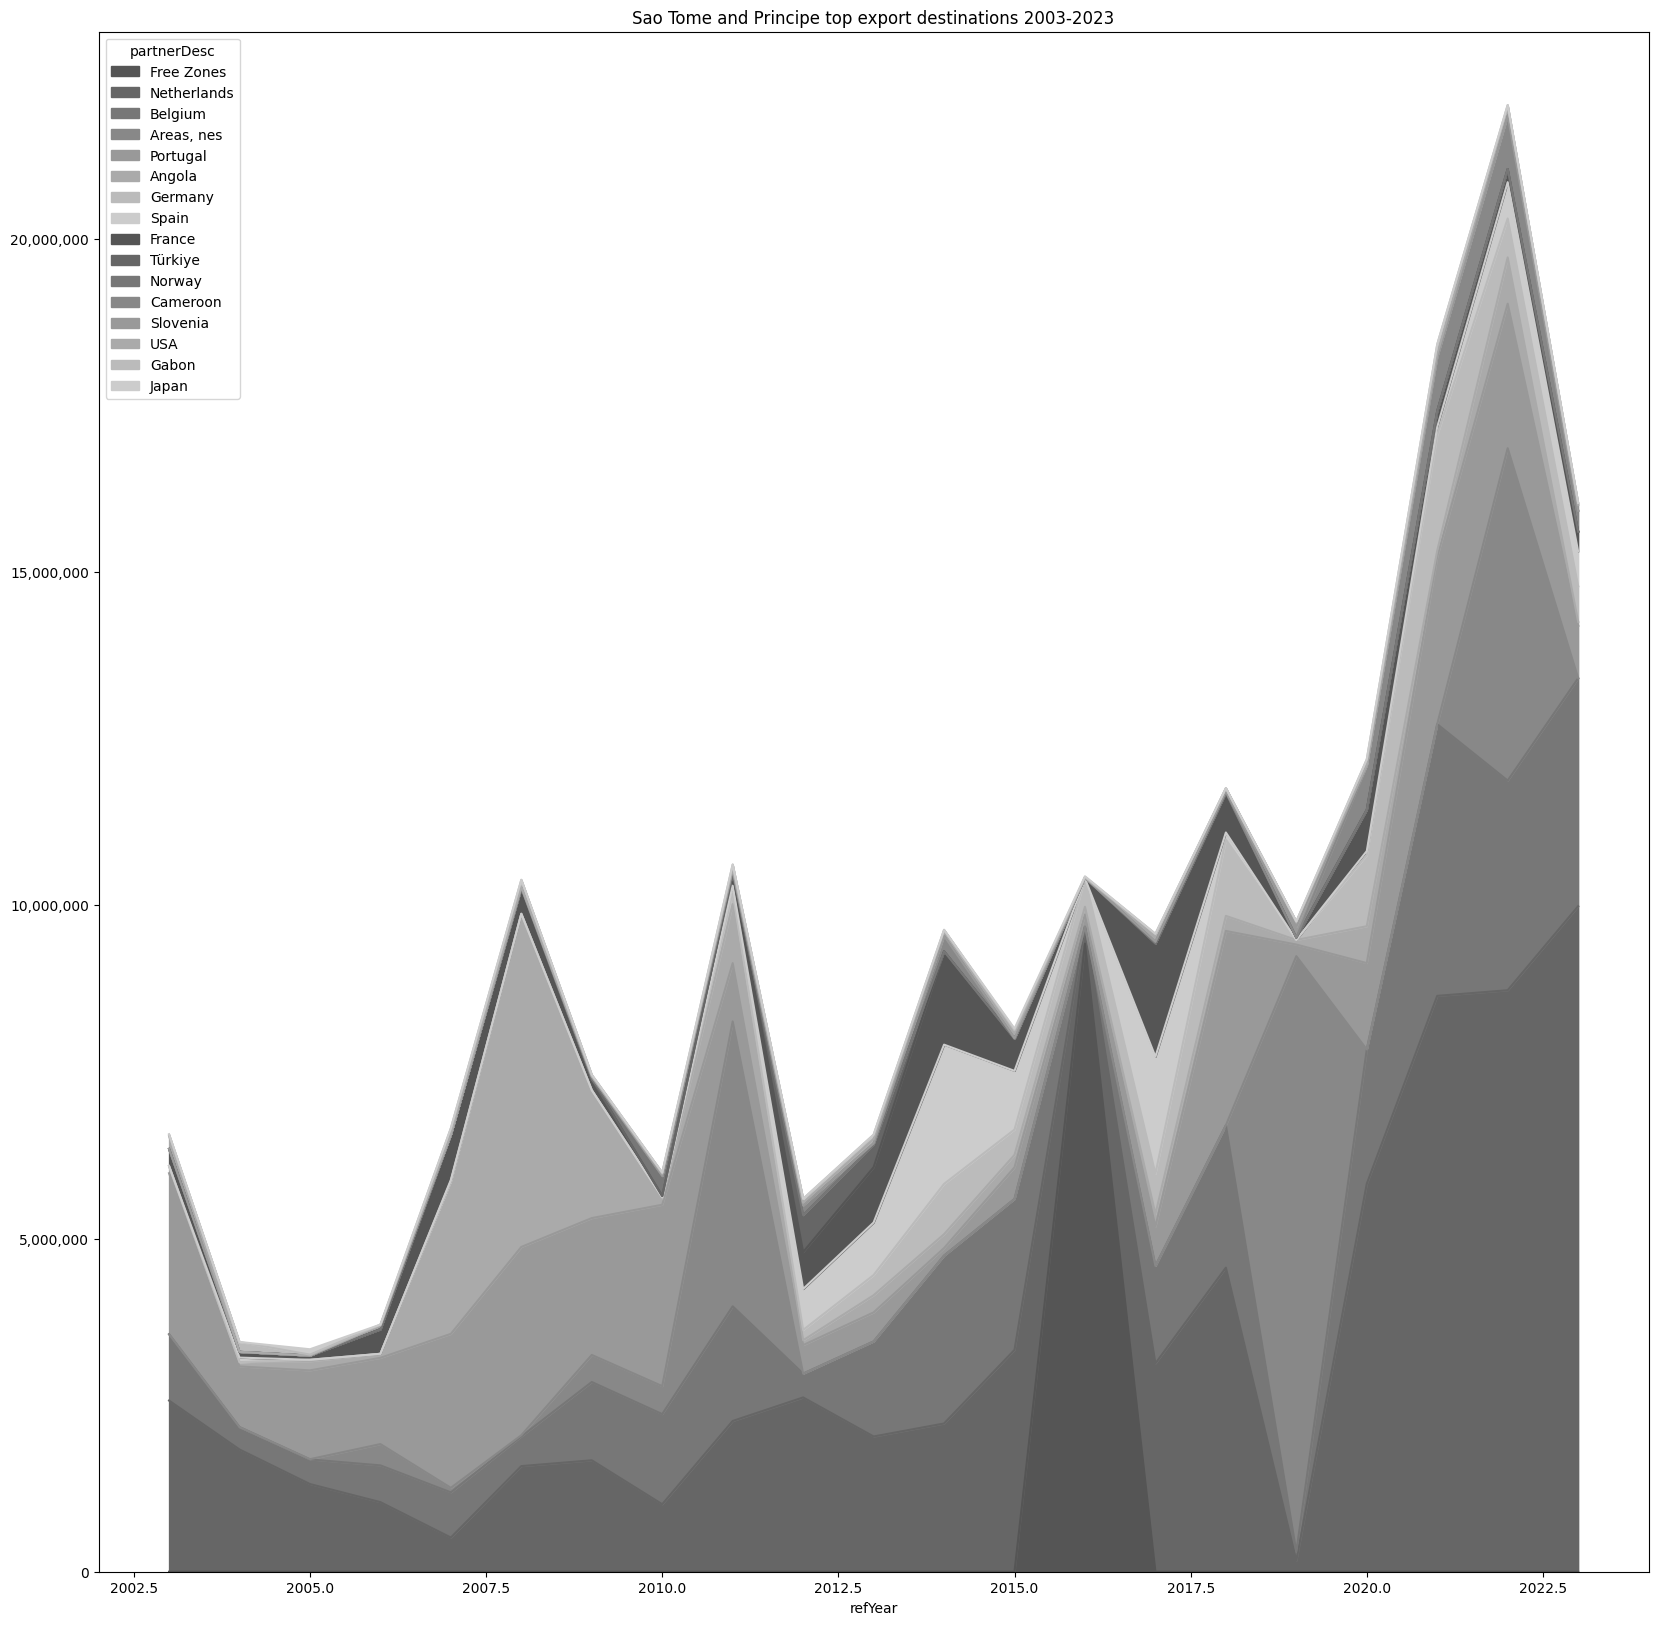

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plotfile = f"reports/{country_of_interest_name}_2.1.4_export_{start_year}-{end_year}_{filename_symmetric_flag}.png"
start_year=values_only.index.min()
end_year=values_only.index.max()
title=f"{country_of_interest_name} top export destinations {start_year}-{end_year}"
print("Plot saved to ", plotfile)
# see https://matplotlib.org/stable/gallery/color/named_colors.html
# colors = ['red','lightsalmon','green','lightgreen','darkviolet','violet','blue','dodgerblue','orange','yellow','brown','black','grey','pink','cyan','magenta',]
# colors = ['crimson', 'darkorange', 'gold', 'limegreen', 'mediumseagreen', 'teal', 'deepskyblue', 'royalblue', 'indigo', 'mediumvioletred', 'hotpink', 'saddlebrown', 'grey', 'black', 'darkslategrey', 'darkkhaki']
colors = [ '#555555', '#666666', '#777777', '#888888', '#999999', '#AAAAAA', '#BBBBBB', '#CCCCCC', ]

fig2 = values_only.plot.area(figsize=(20,20),title=title, color=colors)
for i, line in enumerate(fig2.get_lines()):
    n = i % len(colors)
    print(i, line, colors[n])
    line.set_color(colors[n])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig2.yaxis.set_major_formatter(formatter)

plt.savefig(plotfile)
plt.show()

#### Export to Excel

Table with the top export destinations for the period of interest

In [ ]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]

top_partners_file = f'reports/{country_of_interest_name}_2.1.1_top_export_partners_{filename_symmetric_flag}.xlsx'
top_partners_cols_file = f'reports/{country_of_interest_name}_2.1.2_top_export_partners_cols_{filename_symmetric_flag}.xlsx'
export_top_partners_file = f'reports/{country_of_interest_name}_2.1.3_export_top_{show_only_top}_partners_{start_year}-{end_year}_{filename_symmetric_flag}.xlsx'

exports[cols].sort_values(['refYear','flowCode','partner_rank',f'{partner_column}Desc','cmdCode']).to_excel(top_partners_file)
pivoted.to_excel(top_partners_cols_file)
pivoted[show_only_columns].to_excel(export_top_partners_file)

print(f"Top partners file: {top_partners_file}")
print(f"Top partners cols file: {top_partners_cols_file}")
print(f"Export top partners file: {export_top_partners_file}")

Top partners file: reports/Sao Tome and Principe_2.1.1_top_export_partners_direct.xlsx
Top partners cols file: reports/Sao Tome and Principe_2.1.2_top_export_partners_cols_direct.xlsx
Export top partners file: reports/Sao Tome and Principe_2.1.3_export_top_5_partners_2003-2023_direct.xlsx


### 2.2 Exports: products

#### What are the main exported products

In [ ]:
import pandas as pd

# show 500 lines of dataframes
pd.set_option('display.max_rows', 500)

show_only_top=5

print(country_of_interest_name, years_of_interest)

Sao Tome and Principe 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


Get the products exported by country of interest

In [ ]:

# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = symmetric_reporting  # use mode from previous cells

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
    filename_symmetric_flag="reverse"
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'
    filename_symmetric_flag="direct"

filename_symmetric_flag

'direct'

In [ ]:
import comtradetools

clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World Bank uses AG6
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True

                        )

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

In [ ]:
print("Years available in the data:", list(df.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [ ]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20030101,2003,52,2003,678,STP,Sao Tome and Principe,X,...,100.00,False,NaN,False,NaN,171.00,171.00,0,False,False
1,C,A,20030101,2003,52,2003,678,STP,Sao Tome and Principe,X,...,"2,620.00",False,NaN,False,NaN,"5,919.00","5,919.00",0,False,False
2,C,A,20030101,2003,52,2003,678,STP,Sao Tome and Principe,X,...,979.00,False,NaN,False,NaN,655.00,655.00,0,False,False
3,C,A,20030101,2003,52,2003,678,STP,Sao Tome and Principe,X,...,"5,505.00",False,NaN,False,NaN,"3,415.00","3,415.00",0,False,False
4,C,A,20030101,2003,52,2003,678,STP,Sao Tome and Principe,X,...,85.00,False,NaN,False,NaN,"1,145.00","1,145.00",0,False,False


Agreggate by product, keep the top products exported each year

In [ ]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
exports = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode'],'primaryValue','product',drop_duplicates=True)
exports = exports[exports['product_rank']<=show_only_top]
exports.info()

cols=['refYear','flowCode','product_rank','cmdCode', 'cmdDesc','product_sum','product_upper_perc', 'product_upper_sum']
formats =  comtradetools.make_format(cols)

top_export_products_codes = exports['cmdCode'].unique()

print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")
exports[cols].sort_values(['refYear','flowCode','product_rank']).head(10).style.format(formats)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 37 to 9984
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  105 non-null    object 
 1   freqCode                  105 non-null    object 
 2   refPeriodId               105 non-null    int64  
 3   refYear                   105 non-null    int64  
 4   refMonth                  105 non-null    int64  
 5   period                    105 non-null    object 
 6   reporterCode              105 non-null    int64  
 7   reporterISO               105 non-null    object 
 8   reporterDesc              105 non-null    object 
 9   flowCode                  105 non-null    object 
 10  flowDesc                  105 non-null    object 
 11  partnerCode               105 non-null    int64  
 12  partnerISO                105 non-null    object 
 13  partnerDesc               105 non-null    object 
 14  partner2

,refYear,flowCode,product_rank,cmdCode,cmdDesc,product_sum,product_upper_perc,product_upper_sum
49,2003,X,1,180100,"Cocoa beans; whole or broken, raw or roasted","$12,354,653",93.188%,"$13,257,798"
145,2003,X,2,843039,Coal or rock cutters and tunnelling machinery; not self-propelled,"$82,130",0.619%,"$13,257,798"
37,2003,X,3,080119,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, other than desiccated","$81,367",0.614%,"$13,257,798"
144,2003,X,4,842951,Front-end shovel loaders,"$74,283",0.560%,"$13,257,798"
142,2003,X,5,842920,Graders and levellers,"$69,964",0.528%,"$13,257,798"
293,2004,X,1,180100,"Cocoa beans; whole or broken, raw or roasted","$6,384,432",89.844%,"$7,106,164"
280,2004,X,2,080119,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, other than desiccated","$167,531",2.358%,"$7,106,164"
311,2004,X,3,730799,"Iron or steel; tube or pipe fittings, n.e.s. in item no. 7307.9, other than stainless steel","$135,280",1.904%,"$7,106,164"
290,2004,X,4,151319,"Vegetable oils; coconut (copra) oil and its fractions, other than crude, whether or not refined, but not chemically modified","$56,598",0.796%,"$7,106,164"
318,2004,X,5,820520,"Tools, hand; hammers and sledge hammers","$40,324",0.567%,"$7,106,164"


#### Export to Excel

In [ ]:
filename = f'reports/{country_of_interest_name}_2.2_exports_{clCode}-{cmdDetail}-{exports["refYear"].min()}-{exports["refYear"].max()}_{filename_symmetric_flag}.xlsx'
print("Exporting to ",filename)
exports[cols].sort_values(['refYear','flowCode','product_rank']).to_excel(filename,index=False)

Exporting to  reports/Sao Tome and Principe_2.2_exports_HS-AG6-2003-2023_direct.xlsx


### 2.3 Export partners / products analysis

Which are the partners buying the top exports of country of interest?


In [ ]:

# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = symmetric_reporting  # we keep the previous choice

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
    filename_symmetric_flag="reverse"
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'
    filename_symmetric_flag="direct"

filename_symmetric_flag

'direct'

#### Caveat

Simmetrical reporting can vary greatly from direct reporting.

Example:

Mozambique exports to Netherlands in 2008

#### Analyse assymetric reporting (optional)

Choose pair of countries and a year to compare exports with partner imports

Example: Mozambique exports to Netherlands in 2008 and Netherlands imports from Mozambique in 2008

Netherlands does not reports a 1,451,846,140.00	USD export of Aluminium and articles thereof that Mozambique declares.

Note that World Bank used Mozambique export data as reported by Mozambique:

https://wits.worldbank.org/CountryProfile/en/Country/MOZ/Year/2008/Summarytext

In [ ]:
import comtradetools

analyse_symmetric = False  # if true a symmetry analysis is done, sey the variables bellow

reporterA = country_of_interest
partner = None
year_of_reference = "2009"



##### Compare declared exports with declared imports of partner

In [ ]:
import comtradetools
import pandas as pd

partnerA = comtradetools.encode_country(partner)

if analyse_symmetric:
    clCode = 'HS'
    cmdDetail = 'AG2'  # not all countries report at higher detail

    cols = ['refYear','reporterDesc', 'flowCode','partnerDesc','cmdCode','cmdDesc','primaryValue']
    declared_exports = comtradetools.getFinalData(   # exports as declare by reporter
                            APIKEY,
                            reporterCode=reporterA,
                            typeCode='C',  # commodities
                            freqCode='A',  # annual
                            flowCode='X',
                            period=year_of_reference,
                            partnerCode=partnerA,
                            remove_world=True,
                            partner2Code=0,
                            clCode=clCode,
                            cmdCode=cmdDetail,
                            motCode=0,  # all means of transport
                            customsCode='C00',
                            includeDesc=True,
                            cache=True
                            )

    if declared_exports is None or declared_exports.empty:
        print("The DataFrame is either None or empty.")
    else:
        declared_exports = declared_exports[cols].sort_values('cmdCode')
    partner_imports = comtradetools.getFinalData(   # exports as declared by partner as imports
                        APIKEY,
                        reporterCode=partnerA,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode='M',
                        period=year_of_reference,
                        partnerCode=reporterA,
                        remove_world=True,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True)
    if partner_imports is None or partner_imports.empty:
        print("The DataFrame is either None or empty.")
    else:
        partner_imports = partner_imports[cols].sort_values('cmdCode')

    if (declared_exports is None or declared_exports.empty) or (partner_imports is None or partner_imports.empty):
        compared_data = 'Symmetry analysis not done, no symmetric data available'
    else:
        compared_data = pd.merge(declared_exports[cols], partner_imports[cols],
                                    left_on=['refYear','partnerDesc', 'cmdCode'],
                                    right_on=['refYear','reporterDesc', 'cmdCode'],
                                    how='outer').fillna(0, inplace=False)
        filename = f"reports/{country_of_interest_name}_2.1.5_export_import_symmetry_{partner}_{year_of_reference}.xlsx"
        compared_data.to_excel(filename, index=False)
        print("Symmetry analysis exported to ",filename)
else:
    compared_data = 'Symmetry analysis not done'

compared_data

INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
Symmetry analysis exported to  reports/Sao Tome and Principe_2.1.5_export_import_symmetry_None_2009.xlsx


,refYear,reporterDesc_x,flowCode_x,partnerDesc_x,cmdCode,cmdDesc_x,primaryValue_x,reporterDesc_y,flowCode_y,partnerDesc_y,cmdDesc_y,primaryValue_y
0,2009,Sao Tome and Principe,X,Nigeria,01,Animals; live,"3,890.00",0,0,0,0,0.00
1,2009,Sao Tome and Principe,X,Angola,01,Animals; live,463.00,0,0,0,0,0.00
2,2009,Sao Tome and Principe,X,Bahamas,03,"Fish and crustaceans, molluscs and other aquatic invertebrates",31.00,0,0,0,0,0.00
3,2009,Sao Tome and Principe,X,Cabo Verde,03,"Fish and crustaceans, molluscs and other aquatic invertebrates",77.00,0,0,0,0,0.00
4,2009,Sao Tome and Principe,X,Portugal,03,"Fish and crustaceans, molluscs and other aquatic invertebrates","5,190.00",0,0,0,0,0.00
5,2009,Sao Tome and Principe,X,Gabon,03,"Fish and crustaceans, molluscs and other aquatic invertebrates","1,914.00",0,0,0,0,0.00
6,2009,Sao Tome and Principe,X,Nigeria,03,"Fish and crustaceans, molluscs and other aquatic invertebrates",834.00,0,0,0,0,0.00
7,2009,Sao Tome and Principe,X,Angola,03,"Fish and crustaceans, molluscs and other aquatic invertebrates","1,426.00",0,0,0,0,0.00
8,2009,Sao Tome and Principe,X,Portugal,04,"Dairy produce; birds' eggs; natural honey; edible products of animal origin, not elsewhere specified or included",68.00,Portugal,M,Sao Tome and Principe,"Dairy produce; birds' eggs; natural honey; edible products of animal origin, not elsewhere specified or included","1,405.00"
9,2009,Sao Tome and Principe,X,Italy,04,"Dairy produce; birds' eggs; natural honey; edible products of animal origin, not elsewhere specified or included","238,527.00",0,0,0,0,0.00


Analyse partners

In [ ]:
import warnings
warnings.filterwarnings('default')

clCode = 'HS'
cmdDetail = 'AG6'  # not all countries report at higher detail

df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=True,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

In [ ]:
cols=['refYear','flowCode','reporterDesc','partnerDesc','primaryValue','cmdCode','cmdDesc']
df[cols].sample(10)

,refYear,flowCode,reporterDesc,partnerDesc,primaryValue,cmdCode,cmdDesc
1908,2010,X,Sao Tome and Principe,Nigeria,270.00,850140,"Electric motors; AC motors, single-phase"
6822,2019,X,Sao Tome and Principe,France,"5,899.77",890790,"Floating structures; tanks, coffer-dams, landing stages, buoys and beacons"
373,2004,X,Sao Tome and Principe,Gabon,"20,162.00",820520,"Tools, hand; hammers and sledge hammers"
9254,2022,X,Sao Tome and Principe,Portugal,42.61,640199,"Footwear; waterproof, n.e.c. in heading no. 6401, rubber or plastic outer soles and uppers (not assembled by stitch, rivet, nail, screw, plug or similar)"
2556,2012,X,Sao Tome and Principe,Portugal,"45,275.00",180610,"Cocoa; powder, containing added sugar or other sweetening matter"
5224,2017,X,Sao Tome and Principe,Brazil,134.86,851672,"Electro-thermic appliances; toasters, of a kind used for domestic purposes"
1147,2007,X,Sao Tome and Principe,Portugal,38.00,848330,"Bearing housings, not incorporating ball or roller bearings and plain shaft bearings"
171,2003,X,Sao Tome and Principe,Portugal,166.00,060290,"Plants, live; n.e.s. in heading no. 0602"
5166,2017,X,Sao Tome and Principe,Angola,450.00,853229,"Electrical capacitors; fixed, n.e.c. in heading no. 8532"
6784,2019,X,Sao Tome and Principe,Canada,"4,081.11",731600,"Iron or steel; anchors, grapnels and parts thereof"


In [ ]:
df.refYear.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

Aggregate by partner and keep the main ones

In [ ]:
import pandas as pd
import comtradetools
import warnings

# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='cmd_partner'
# remove world
if 0 in df[f'{partner_column}Code'].unique():
    warnings.warn("Removing world from data")
    df = df[df[f'{partner_column}Code']!=0]

products_and_partners = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode',f'{partner_column}Code'],'primaryValue',prefix,drop_duplicates=True)

cols=['refYear',f'{reporter_column}Desc','flowCode','cmdCode','cmdDesc',f'{partner_column}Desc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats=comtradetools.make_format(cols)
products_and_partners=products_and_partners[(products_and_partners['cmdCode'].isin(top_export_products_codes)
                       & (products_and_partners[f'{prefix}_rank']<=show_only_top))]


Top products exported by Sao Tome and Principe in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['080119' '180100' '842920' '842951' '843039' '151319' '730799' '820520'
 '150790' '870333' '220410' '220300' '870899' '180631' '840310' '842940'
 '271000' '180690' '843319' '080111' '999999' '870323' '150710' '180610'
 '271011' '490700' '732620' '842240' '630900' '180620' '090411' '100620'
 '180632' '852580' '720410' '851712' '880220' '903300' '901580' '880330'
 '151110' '890690' '151311' '090420' '090421']
   080119: Nuts, edible; coconuts, fresh or dried, other than desiccated or in the inner shell (endocarp)
   180100: Cocoa beans; whole or broken, raw or roasted
   842920: Graders and levellers
   842951: Front-end shovel loaders
   843039: Coal or rock cutters and tunnelling machinery; not self-propelled
   151319: Vegetable oils; coconut (copra) oil and its fractions, other than crude, whether or not refined, but not chemica

#### Show partners for main export products

In [ ]:
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                             ascending=[True,True,False,True])\
                                             .head(10).style.format(formats) #.hide(axis='index')

,refYear,reporterDesc,flowCode,cmdCode,cmdDesc,partnerDesc,cmd_partner_rank,cmd_partner_sum,cmd_partner_perc,cmd_partner_upper_sum
161,2003,Sao Tome and Principe,X,180100,"Cocoa beans; whole or broken, raw or roasted",Netherlands,1,"$2,568,398",41.578%,"$6,177,327"
198,2003,Sao Tome and Principe,X,180100,"Cocoa beans; whole or broken, raw or roasted",Portugal,2,"$2,165,309",35.053%,"$6,177,327"
49,2003,Sao Tome and Principe,X,180100,"Cocoa beans; whole or broken, raw or roasted",Belgium,3,"$995,681",16.118%,"$6,177,327"
51,2003,Sao Tome and Principe,X,180100,"Cocoa beans; whole or broken, raw or roasted",France,4,"$256,443",4.151%,"$6,177,327"
252,2003,Sao Tome and Principe,X,180100,"Cocoa beans; whole or broken, raw or roasted",USA,5,"$191,496",3.100%,"$6,177,327"
220,2003,Sao Tome and Principe,X,843039,Coal or rock cutters and tunnelling machinery; not self-propelled,Portugal,1,"$41,065",100.000%,"$41,065"
37,2003,Sao Tome and Principe,X,080119,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, other than desiccated",Angola,1,"$38,244",94.003%,"$40,684"
60,2003,Sao Tome and Principe,X,080119,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, other than desiccated",Gabon,2,"$1,236",3.038%,"$40,684"
165,2003,Sao Tome and Principe,X,080119,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, other than desiccated",Nigeria,3,"$1,204",2.959%,"$40,684"
219,2003,Sao Tome and Principe,X,842951,Front-end shovel loaders,Portugal,1,"$29,110",78.375%,"$37,142"


#### Export to Excel

In [ ]:
filename = f'reports/{country_of_interest_name}_2.3_exports_products_partners_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}_{filename_symmetric_flag}.xlsx'
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                             ascending=[True,True,False,True]).to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Sao Tome and Principe_2.3_exports_products_partners_HS-AG6-2003-2023_direct.xlsx


### 2.4 Main clients and products exported 

Detail of the main products by export partner.

Allows to analyse the mix of products of the main export partners from this country

In [ ]:
top_export_partners

array(['Canada', 'Germany', 'Japan', 'United Kingdom', 'Areas, nes',
       'France', 'China', 'Mexico', 'Netherlands', 'Russian Federation',
       'Special Categories'], dtype=object)

In [ ]:
import comtradetools

show_only_top = 5

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='partner_cmd'
partners_and_products = comtradetools.total_rank_perc(df,['refYear','flowCode',f'{partner_column}Code','cmdCode'],'primaryValue',prefix,drop_duplicates=False)

cols=['refYear',f'{reporter_column}Desc','flowCode',f'{partner_column}Desc','cmdCode','cmdDesc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats = comtradetools.make_format(cols)
partners_and_products=partners_and_products[(partners_and_products[f'{partner_column}Desc'].isin(top_export_partners)
                       & (partners_and_products[f'{prefix}_rank']<=show_only_top))]

print("First rows")
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).head(10).style.format(formats).hide(axis='index')

Top export partners (11): ['Canada' 'Germany' 'Japan' 'United Kingdom' 'Areas, nes' 'France' 'China'
 'Mexico' 'Netherlands' 'Russian Federation' 'Special Categories']
First rows


refYear,reporterDesc,flowCode,partnerDesc,cmdCode,cmdDesc,partner_cmd_rank,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2003,Sao Tome and Principe,X,Netherlands,180100,"Cocoa beans; whole or broken, raw or roasted",1,"$2,568,398",100.000%,"$2,568,398"
2003,Sao Tome and Principe,X,France,180100,"Cocoa beans; whole or broken, raw or roasted",1,"$256,443",100.000%,"$256,443"
2003,Sao Tome and Principe,X,Japan,870323,"Vehicles; spark-ignition internal combustion reciprocating piston engine, cylinder capacity exceeding 1500cc but not exceeding 3000cc",1,"$5,408",52.429%,"$10,315"
2003,Sao Tome and Principe,X,Japan,870290,"Vehicles; public transport type (carries 10 or more passengers), other than compression-ignition internal combustion piston engine (diesel or semi-diesel)",2,"$4,896",47.465%,"$10,315"
2003,Sao Tome and Principe,X,Japan,870870,Vehicles; road wheels and parts and accessories thereof,3,$11,0.107%,"$10,315"
2004,Sao Tome and Principe,X,Netherlands,180100,"Cocoa beans; whole or broken, raw or roasted",1,"$1,834,384",100.000%,"$1,834,384"
2004,Sao Tome and Principe,X,France,180100,"Cocoa beans; whole or broken, raw or roasted",1,"$86,317",100.000%,"$86,317"
2005,Sao Tome and Principe,X,Netherlands,180100,"Cocoa beans; whole or broken, raw or roasted",1,"$1,315,625",100.000%,"$1,315,625"
2005,Sao Tome and Principe,X,Japan,180100,"Cocoa beans; whole or broken, raw or roasted",1,"$70,494",87.654%,"$80,423"
2005,Sao Tome and Principe,X,Japan,870322,"Vehicles; spark-ignition internal combustion reciprocating piston engine, cylinder capacity exceeding 1000cc but not exceeding 1500cc",2,"$8,028",9.982%,"$80,423"


Last rows

In [ ]:
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).tail(10).style.format(formats).hide(axis='index')

refYear,reporterDesc,flowCode,partnerDesc,cmdCode,cmdDesc,partner_cmd_rank,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2023,Sao Tome and Principe,X,Germany,180632,"Chocolate and other food preparations containing cocoa; in blocks, slabs or bars, (not filled), weighing 2kg or less",2,"$2,224",0.418%,"$532,378"
2023,Sao Tome and Principe,X,Germany,180620,"Chocolate & other food preparations containing cocoa; in blocks, slabs or bars weighing more than 2kg or in liquid, paste, powder, granular or other bulk form in containers or immediate packings, content exceeding 2kg",3,$327,0.061%,"$532,378"
2023,Sao Tome and Principe,X,France,999999,Commodities not specified according to kind,1,"$136,069",45.283%,"$300,485"
2023,Sao Tome and Principe,X,France,090421,"Spices; fruits of the genus Capsicum or Pimenta, dried, neither crushed nor ground",2,"$118,791",39.533%,"$300,485"
2023,Sao Tome and Principe,X,France,180100,"Cocoa beans; whole or broken, raw or roasted",3,"$32,678",10.875%,"$300,485"
2023,Sao Tome and Principe,X,France,180632,"Chocolate and other food preparations containing cocoa; in blocks, slabs or bars, (not filled), weighing 2kg or less",4,"$6,402",2.130%,"$300,485"
2023,Sao Tome and Principe,X,France,121190,"Plants and parts (including seeds and fruits) n.e.c. in heading no. 1211, of a kind used primarily in perfumery, in pharmacy or for insecticidal, fungicidal or similar purposes, fresh, chilled, frozen or dried, whether or not cut, crushed or powdered",5,"$4,860",1.617%,"$300,485"
2023,Sao Tome and Principe,X,"Areas, nes",630900,"Clothing; worn, and other worn articles",1,"$2,718",100.000%,"$2,718"
2023,Sao Tome and Principe,X,China,851769,"Communication apparatus (excluding telephone sets or base stations); machines for the transmission or reception of voice, images or other data (including wired/wireless networks), n.e.c. in item no. 8517.6",1,$320,100.000%,$320
2023,Sao Tome and Principe,X,United Kingdom,151319,"Vegetable oils; coconut (copra) oil and its fractions, other than crude, whether or not refined, but not chemically modified",1,$106,100.000%,$106


In [ ]:
filename = f'reports/{country_of_interest_name}_2.4_exports_partners_products_{clCode}-{cmdDetail}-{partners_and_products["refYear"].min()}-{partners_and_products["refYear"].max()}_{filename_symmetric_flag}.xlsx'
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False])[cols].to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Sao Tome and Principe_2.4_exports_partners_products_HS-AG6-2003-2023_direct.xlsx


### 2.5 Alternative suppliers of costumers of country of interest




For each year, partner, exported commodity, fetches all the imports of
the commodity by partner from other countries, and computes the ranking
of country of interest among the suppliers of partner for that commodity,
e.g.

Country of interest：Angola, in 2021, China, exported commodity code 270900 "Oils; petroleum oils and oils obtained 
from bituminous minerals, crude" ; fetch all suppliers of 270900 of China and compute
the ranking of Angola.


First step is to get the combos of partner and commodity

In [ ]:
combos_of_interest = partners_and_products[(partners_and_products['cmdCode'].isin(top_export_products_codes)
                & (partners_and_products[f'{partner_column}Code'].isin(top_export_partners_codes)))][[f'{partner_column}Code','cmdCode']].drop_duplicates()
combos_of_interest = [tuple(x) for x in combos_of_interest.values]
len(combos_of_interest)

135

In [ ]:
# create lists of commodities codes and country codes to query comtrade
cmdCode_list = [cmdCode for (countryCode,cmdCode) in combos_of_interest]
cmdCode_list = list(set(cmdCode_list))
countryCode_list = [countryCode for (countryCode,cmdCode) in combos_of_interest]
countryCode_list = list(set(countryCode_list))
cmdCodeCSV = ','.join(cmdCode_list)
countryCodeCSV = ','.join(map(str,countryCode_list))

Get all the suppliers of client for products exported by contry of interest.

In [ ]:
print("Years of interest: ", years_of_interest)
print("countryCodeCSV: ", countryCodeCSV)
print("cmdCodeCSV: ", cmdCodeCSV)

df = comtradetools.getFinalData(APIKEY,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode='M',
                                reporterCode=countryCodeCSV,
                                partnerCode=None,
                                remove_world=True,
                                partner2Code=0,
                                period=years_of_interest,
                                period_size=1,
                                clCode=clCode,
                                cmdCode=cmdCodeCSV,  # Top level product types
                                motCode=0,  # all means of transport
                                customsCode='C00',
                                includeDesc=True,
                                cache=True,

                                )

Years of interest:  2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
countryCodeCSV:  705,899,579,838,392,266,842,620,528,792,724,276,24,56,251,120
cmdCodeCSV:  220410,090421,271000,843039,220300,820520,852580,842920,180631,732620,720410,999999,630900,180620,851712,080119,100620,870323,090411,730799,151319,903300,890690,880330,180690,080111,842240,880220,151110,180610,870333,842940,840310,843319,090420,842951,901580,180632,490700,180100,151311,271011
INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling g

Alternative, concatenating

In [ ]:
import pandas as pd

try_alternative = False

if try_alternative:
    df2: pd.DataFrame = None
    for countryCode,cmdCode in combos_of_interest:
        print(countryCode,cmdCode)
        tmp = comtradetools.getFinalData(APIKEY,
                                        reporterCode=countryCode,
                                        typeCode='C',  # commodities
                                        freqCode='A',  # annual
                                        flowCode='M',
                                        partnerCode=None,
                                        remove_world=True,
                                        partner2Code=0,
                                        period=years_of_interest,
                                        period_size=1,
                                        clCode='HS',
                                        cmdCode=cmdCode,  # Top level product types
                                        customsCode='C00',
                                        motCode=0,  # all means of transport
                                        )
        if df2 is None:
            df2 = tmp
        else:
            df2 = pd.concat([df2,tmp],axis=0)


Partners buying top products of country of interest.

In [ ]:
list(df.reporterDesc.unique()), list(df.partnerDesc.unique())


(['Cameroon',
  'Belgium',
  'Gabon',
  'France',
  'Germany',
  'Japan',
  'Norway',
  'Portugal',
  'Netherlands',
  'Slovenia',
  'Spain',
  'Türkiye',
  'USA',
  'Angola'],
 ['Albania',
  'Andorra',
  'Angola',
  'Australia',
  'Argentina',
  'Belgium',
  'Austria',
  'Brazil',
  'Brunei Darussalam',
  'Cameroon',
  'Canada',
  'Sri Lanka',
  'China',
  'Congo',
  'Czechia',
  'Benin',
  'Denmark',
  'Ecuador',
  'Equatorial Guinea',
  'France',
  'Finland',
  'Gabon',
  'Germany',
  'Ghana',
  'Greece',
  'China, Hong Kong SAR',
  'Indonesia',
  'Iran',
  'Israel',
  'Italy',
  "Côte d'Ivoire",
  'Japan',
  'Jordan',
  'Kenya',
  "Dem. People's Rep. of Korea",
  'Rep. of Korea',
  'Lebanon',
  'Lithuania',
  'Malaysia',
  'Mali',
  'Other Asia, nes',
  'Morocco',
  'Oman',
  'Netherlands',
  'Nigeria',
  'Other Europe, nes',
  'Norway',
  'Pakistan',
  'Philippines',
  'Portugal',
  'Poland',
  'Senegal',
  'Russian Federation',
  'Saudi Arabia',
  'India',
  'Singapore',
  'Slova

For each partner show the top supliers of the products bought from country of interest. 

If country of interest is not in the top five, show position anyway if it is a supplier in the given year 

In [ ]:
import pandas as pd
import comtradetools

#  set max rows to 500
pd.set_option('display.max_rows', 1500)


other_suppliers = comtradetools.total_rank_perc(
                                        df,
                                        groupby=['refYear','flowCode','reporterCode','cmdCode','partnerCode'],
                                        col='primaryValue',
                                        prefix='cmd_partner',
                                        )

other_suppliers = other_suppliers[other_suppliers[['reporterCode','cmdCode']].apply(tuple,axis=1).isin(combos_of_interest)]
cols=['reporterDesc','flowCode','refYear','cmdCode','cmdDesc','cmd_partner_rank','partnerDesc','primaryValue','cmd_partner_perc','cmd_partner_upper_sum']
formats =  comtradetools.make_format(cols)

other_suppliers[(other_suppliers['partnerCode'] == country_of_interest)
                | (other_suppliers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).head(20).style.format(formats).hide(axis="index")

reporterDesc,flowCode,refYear,cmdCode,cmdDesc,cmd_partner_rank,partnerDesc,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Angola,M,2007,080111,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, desiccated",1,Sri Lanka,"$537,039",66.833%,"$803,550"
Angola,M,2007,080111,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, desiccated",2,Indonesia,"$57,600",7.168%,"$803,550"
Angola,M,2007,080111,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, desiccated",3,Portugal,"$57,090",7.105%,"$803,550"
Angola,M,2007,080111,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, desiccated",4,Poland,"$42,280",5.262%,"$803,550"
Angola,M,2007,080111,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, desiccated",5,China,"$31,102",3.871%,"$803,550"
Angola,M,2007,080111,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, desiccated",11,Sao Tome and Principe,"$3,810",0.474%,"$803,550"
Angola,M,2009,080111,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, desiccated",1,Sri Lanka,"$864,109",48.559%,"$1,779,515"
Angola,M,2009,080111,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, desiccated",2,Portugal,"$521,266",29.293%,"$1,779,515"
Angola,M,2009,080111,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, desiccated",3,Indonesia,"$291,820",16.399%,"$1,779,515"
Angola,M,2009,080111,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, desiccated",4,South Africa,"$53,224",2.991%,"$1,779,515"


### Ranking of country of interest in the supliers of main export products

Allows assessment of the importance of country of interest for the partners
that are buying its main exports.

In [ ]:
ignore_if_rank_is_higher = 25

relevant_for_partner_imports=other_suppliers[
    (other_suppliers['partnerCode'
                     ] == country_of_interest) &
    (other_suppliers['cmd_partner_rank'] < ignore_if_rank_is_higher)

                     ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank'])
relevant_for_partner_imports.head(50).style.format(formats).hide(axis='index')

reporterDesc,flowCode,refYear,cmdCode,cmdDesc,cmd_partner_rank,partnerDesc,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Angola,M,2007,080111,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, desiccated",11,Sao Tome and Principe,"$3,810",0.474%,"$803,550"
Angola,M,2009,080111,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, desiccated",6,Sao Tome and Principe,"$8,100",0.455%,"$1,779,515"
Angola,M,2010,080111,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, desiccated",7,Sao Tome and Principe,"$9,575",1.463%,"$654,585"
Angola,M,2013,080111,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, desiccated",8,Sao Tome and Principe,"$16,254",1.378%,"$1,179,815"
Angola,M,2014,080111,"Nuts, edible; coconuts, desiccated",7,Sao Tome and Principe,"$13,125",0.917%,"$1,431,474"
Angola,M,2017,080111,"Nuts, edible; coconuts, desiccated",9,Sao Tome and Principe,"$3,971",0.589%,"$674,102"
Angola,M,2022,080111,"Nuts, edible; coconuts, desiccated",5,Sao Tome and Principe,"$24,166",8.026%,"$301,113"
Angola,M,2007,080119,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, other than desiccated",1,Sao Tome and Principe,"$45,100",35.257%,"$127,917"
Angola,M,2013,080119,"Nuts, edible; coconuts, fresh or dried, whether or not shelled or peeled, other than desiccated",2,Sao Tome and Principe,"$48,859",27.594%,"$177,067"
Angola,M,2014,080119,"Nuts, edible; coconuts, fresh or dried, other than desiccated or in the inner shell (endocarp)",7,Sao Tome and Principe,"$18,525",2.692%,"$688,159"


In [ ]:
filename = f'reports/{country_of_interest_name}_2.5.1_export_partners_alternative_{filename_symmetric_flag}.xlsx'
print("Exporting to ",filename)
other_suppliers[cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).to_excel(filename)

Exporting to  reports/Sao Tome and Principe_2.5.1_export_partners_alternative_direct.xlsx


In [ ]:
filename = f'reports/{country_of_interest_name}_2.5.2_export_partners_alternative_relevant_{filename_symmetric_flag}.xlsx'
print("Exporting to ",filename)
relevant_for_partner_imports.to_excel(filename)

Exporting to  reports/Sao Tome and Principe_2.5.2_export_partners_alternative_relevant_direct.xlsx


## 3. Imports

In [ ]:
print(country_of_interest_name, years_of_interest)

Sao Tome and Principe 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


### 3.1 Main import partners

Collect imports to country of interest.

Use either reported imports by country of interest, 
or reported exports to country of interest by
all other countries (symmetric reporting). 

Set variable `symmetric_reporting` to choose.

In [ ]:
# If symmetric_reporting is "True" we get the imports from
#    the reported exports of all the countries
# i.e. instead of asking Country of Interest for import data we ask the world
#    for export data towards Country of Interest

symmetric_reporting = True  # set to false to use reported imports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'



In [ ]:
clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World bank uses AG6, but some codes AG4
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,  # imports
                        partnerCode=partnerCode, # every body
                        remove_world=True,
                        partner2Code=0, # ignore parter2
                        period=years_of_interest,
                        period_size=1,
                        clCode="HS",
                        cmdCode="TOTAL",
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True
                        )

INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalData for period 2014
INFO:root:Calling getFinalData for period 2015
INFO:root:Calling getFinalData for period 2016
INFO:root:Calling getFinalData for period 2017
INFO:root:Calling getFinalData for period 2018
INFO:root:Calling getFinalData for period 2019
INFO:root:Calling getFinalData for period 2020
INFO:root:Calling getFinalData for period 2021
INFO:root:Calling getFinalData for period 2022
INFO:root:Calling getFinalData for period 2023


Compute percentage of trade and rank of partners for each year.

Use `show_only_top` to show only the top partners (e.g. 5).

In [ ]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
partner_column = 'partner'
reporter_column = 'reporter'

# aggregate by year, flow, reporter
imports = comtradetools.total_rank_perc(df,groupby=['refYear','flowCode',f'{partner_column}Desc'],
                                    col='primaryValue',
                                    prefix='partner',
                                    drop_duplicates=True)

cols=['refYear','flowCode',f'{reporter_column}Desc','partner_rank',f'{partner_column}Desc','partner_sum','partner_perc','partner_upper_perc']

formats =  comtradetools.make_format(cols)

top_import_partners = imports[imports['partner_rank']<=show_only_top][f'{partner_column}Desc'].unique()
top_import_partners_codes = imports[imports['partner_rank']<=show_only_top][f'{partner_column}Code'].unique()

print(f"Top {show_only_top} import partners of {country_of_interest_name} in {years_of_interest}: \n{top_import_partners}")
imports[imports['partner_rank']<=show_only_top][cols].sort_values(['refYear','flowCode','partner_rank']).style.format(formats)

Top 5 import partners of Sao Tome and Principe in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023: 
['Angola' 'Belgium' 'Gabon' 'Japan' 'Portugal' 'Viet Nam' 'Areas, nes'
 'Netherlands' 'Nigeria' 'Thailand' 'Brazil' 'France' 'USA' 'Spain'
 'China' 'Togo' 'Italy' 'Türkiye']


,refYear,flowCode,reporterDesc,partner_rank,partnerDesc,partner_sum,partner_perc,partner_upper_perc
27,2003,M,Sao Tome and Principe,1,Portugal,"$25,839,477",63.280%,63.280%
3,2003,M,Sao Tome and Principe,2,Belgium,"$4,677,835",11.456%,11.456%
1,2003,M,Sao Tome and Principe,3,Angola,"$4,213,562",10.319%,10.319%
25,2003,M,Sao Tome and Principe,4,Japan,"$2,581,595",6.322%,6.322%
14,2003,M,Sao Tome and Principe,5,Gabon,"$858,636",2.103%,2.103%
73,2004,M,Sao Tome and Principe,1,Portugal,"$25,180,951",60.774%,60.774%
43,2004,M,Sao Tome and Principe,2,Angola,"$6,478,640",15.636%,15.636%
45,2004,M,Sao Tome and Principe,3,Belgium,"$3,698,307",8.926%,8.926%
65,2004,M,Sao Tome and Principe,4,Japan,"$2,522,294",6.088%,6.088%
57,2004,M,Sao Tome and Principe,5,Gabon,"$462,803",1.117%,1.117%


Pivot the countries to columns, keeping the total value and percentage in separate columns.

----

Passamos os países para colunas, mantendo a percentagem e o valor em separado.

In [ ]:
pivoted = df.pivot_table(index=['refYear','flowDesc'], columns=f'{partner_column}Desc', values=['primaryValue','partner_perc'])
pivoted.swaplevel(axis=1).fillna(0,inplace=True)
pivoted.sort_index(axis=1, level=0, inplace=True)
pivoted.fillna(0, inplace=True)
pivoted

partner_perc                                          \
partnerDesc       Afghanistan Albania Algeria Andorra Angola Anguilla   
refYear flowDesc                                                        
2003    Import           0.00    0.00    0.00    0.00   0.10     0.00   
2004    Import           0.00    0.00    0.00    0.00   0.16     0.00   
2005    Import           0.00    0.00    0.00    0.00   0.20     0.00   
2006    Import           0.00    0.00    0.00    0.00   0.20     0.00   
2007    Import           0.00    0.00    0.00    0.00   0.20     0.00   
2008    Import           0.00    0.00    0.00    0.00   0.23     0.00   
2009    Import           0.00    0.00    0.00    0.00   0.15     0.00   
2010    Import           0.00    0.00    0.00    0.00   0.16     0.00   
2011    Import           0.00    0.00    0.00    0.00   0.11     0.00   
2012    Import           0.00    0.00    0.00    0.00   0.22     0.00   
2013    Import           0.00    0.00    0.00    0.00   0.25     0.00   
2014    Import           0.00    0.00    0.00    0.00   0.21     0.00   
2015    Import           0.00    0.00    0.00    0.00   0.21     0.00   
2016    Import           0.00    0.00    0.00    0.00   0.15     0.00   
2017    Import           0.00    0.00    0.00    0.00   0.20     0.00   
2018    Import           0.00    0.00    0.00    0.00   0.23     0.00   
2019    Import           0.00    0.00    0.00    0.00   0.20     0.00   
2020    Import           0.00    0.00    0.00    0.00   0.11     0.00   
2021    Import           0.00    0.00    0.00    0.00   0.12     0.00   
2022    Import           0.00    0.00    0.00    0.00   0.16     0.00   
2023    Import           0.00    0.00    0.00    0.00   0.14     0.00   

                                                                     ...  \
partnerDesc      Antigua and Barbuda Areas, nes Argentina Australia  ...   
refYear flowDesc                                                     ...   
2003    Import                  0.00       0.00      0.00      0.00  ...   
2004    Import                  0.00       0.01      0.00      0.00  ...   
2005    Import                  0.00       0.00      0.00      0.00  ...   
2006    Import                  0.00       0.01      0.00      0.00  ...   
2007    Import                  0.00       0.00      0.00      0.00  ...   
2008    Import                  0.00       0.01      0.00      0.00  ...   
2009    Import                  0.00       0.02      0.00      0.00  ...   
2010    Import                  0.00       0.01      0.00      0.00  ...   
2011    Import                  0.00       0.00      0.00      0.00  ...   
2012    Import                  0.00       0.00      0.00      0.00  ...   
2013    Import                  0.00       0.00      0.00      0.00  ...   
2014    Import                  0.00       0.00      0.00      0.00  ...   
2015    Import                  0.00       0.00      0.00      0.00  ...   
2016    Import                  0.00       0.00      0.00      0.00  ...   
2017    Import                  0.00       0.00      0.00      0.00  ...   
2018    Import                  0.00       0.00      0.00      0.00  ...   
2019    Import                  0.00       0.00      0.00      0.00  ...   
2020    Import                  0.00       0.00      0.00      0.00  ...   
2021    Import                  0.00       0.00      0.00      0.00  ...   
2022    Import                  0.00       0.00      0.00      0.00  ...   
2023    Import                  0.00       0.00      0.00      0.00  ...   

                 primaryValue                                      \
partnerDesc           Ukraine United Arab Emirates United Kingdom   
refYear flowDesc                                                    
2003    Import           0.00                 0.00      25,518.00   
2004    Import           0.00            23,231.00      79,596.00   
2005    Import           0.00            76,525.00      87,249.00   
2006    Import           

Limit table to top import partners

Note that the number of top partners considered was set before with `show_only_top` (e.g. 5).

But each year the top partners may vary, so that the total number of partners for the period will be
more than `show_only_top`.

In [ ]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_import_partners]
pivoted[show_only_columns]

partner_perc                                               \
partnerDesc            Angola Areas, nes Belgium Brazil China France Gabon   
refYear flowDesc                                                             
2003    Import           0.10       0.00    0.11   0.00  0.00   0.01  0.02   
2004    Import           0.16       0.01    0.09   0.00  0.00   0.01  0.01   
2005    Import           0.20       0.00    0.06   0.01  0.00   0.00  0.01   
2006    Import           0.20       0.01    0.04   0.01  0.00   0.01  0.01   
2007    Import           0.20       0.00    0.02   0.01  0.01   0.00  0.01   
2008    Import           0.23       0.01    0.02   0.01  0.01   0.00  0.03   
2009    Import           0.15       0.02    0.02   0.10  0.01   0.00  0.03   
2010    Import           0.16       0.01    0.03   0.01  0.02   0.00  0.05   
2011    Import           0.11       0.00    0.02   0.01  0.02   0.03  0.02   
2012    Import           0.22       0.00    0.03   0.00  0.02   0.01  0.02   
2013    Import           0.25       0.00    0.02   0.00  0.02   0.01  0.01   
2014    Import           0.21       0.00    0.02   0.00  0.02   0.01  0.02   
2015    Import           0.21       0.00    0.01   0.00  0.03   0.01  0.02   
2016    Import           0.15       0.00    0.02   0.01  0.05   0.01  0.02   
2017    Import           0.20       0.00    0.01   0.01  0.05   0.02  0.01   
2018    Import           0.23       0.00    0.01   0.02  0.06   0.01  0.01   
2019    Import           0.20       0.00    0.04   0.02  0.06   0.01  0.01   
2020    Import           0.11       0.00    0.01   0.03  0.05   0.01  0.01   
2021    Import           0.12       0.00    0.02   0.02  0.07   0.01  0.01   
2022    Import           0.16       0.00    0.01   0.02  0.04   0.00  0.01   
2023    Import           0.14       0.00    0.00   0.02  0.05   0.01  0.02   

                                          ...  primaryValue               \
partnerDesc      Italy Japan Netherlands  ...         Japan  Netherlands   
refYear flowDesc                          ...                              
2003    Import    0.00  0.06        0.00  ...  2,581,595.00   202,054.00   
2004    Import    0.00  0.06        0.01  ...  2,522,294.00   354,890.00   
2005    Import    0.00  0.07        0.00  ...  3,554,960.00   181,768.00   
2006    Import    0.00  0.01        0.01  ...    492,411.00   558,599.00   
2007    Import    0.00  0.00        0.01  ...    206,909.00 1,149,063.00   
2008    Import    0.00  0.01        0.00  ...    910,960.00   147,399.00   
2009    Import    0.00  0.04        0.00  ...  4,522,368.00   401,383.00   
2010    Import    0.00  0.02        0.01  ...  2,620,362.00   761,561.00   
2011    Import    0.00  0.03        0.00  ...  3,521,985.00   533,819.00   
2012    Import    0.00  0.02        0.00  ...  2,773,995.00   501,270.00   
2013    Import    0.00  0.01        0.00  ...  2,155,236.00   392,086.00   
2014    Import    0.00  0.01        0.01  ...    877,892.00 1,789,466.00   
2015    Import    0.00  0.02        0.01  ...  3,173,741.00 1,371,984.00   
2016    Import    0.00  0.02        0.01  ...  3,289,022.00   913,142.00   
2017    Import    0.00  0.01        0.01  ...  1,731,540.85 1,738,525.62   
2018    Import    0.00  0.01        0.01  ...  1,109,550.07 1,546,809.06   
2019    Import    0.00  0.02        0.01  ...  2,332,642.99 1,809,180.07   
2020    Import    0.00  0.00        0.02  ...    633,186.96 2,161,801.58   
2021    Import    0.00  0.03        0.01  ...  5,093,755.45 2,245,743.48   
2022    Import    0.05  0.01        0.01  ...  2,161,422.42 1,266,912.56   
2023    Import    0.00  0.06        0.01  ... 10,240,115.11 1,770,021.31   

                                                                        \
partnerDesc           Nigeria       Portugal        Spain     Thailand   
refYear flowDesc                                                         
2003    Import      42,921.00  25,839,477.00   141,825.00         0.00   
2004    Import     119,

Make a table with the total value of import from top partners in the period of interest

In [ ]:
print("Top partners for import: ",top_import_partners)
print("Period of interest:",years_of_interest)

Top partners for import:  ['Angola' 'Belgium' 'Gabon' 'Japan' 'Portugal' 'Viet Nam' 'Areas, nes'
 'Netherlands' 'Nigeria' 'Thailand' 'Brazil' 'France' 'USA' 'Spain'
 'China' 'Togo' 'Italy' 'Türkiye']
Period of interest: 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [ ]:
import pandas as pd

# lets get just the value of imports from the top export partners
values_only = pivoted.loc[:,"primaryValue"]
values_only.reset_index(level=1, drop=True, inplace=True)
show_only_columns = [country for country in values_only.columns.tolist() if country in top_import_partners]
values_only=values_only[show_only_columns]
# sort columns by mean value
mean_values = values_only.mean().sort_values(ascending=False)
values_only = values_only[mean_values.index]
values_only

partnerDesc,Portugal,Angola,Togo,China,Japan,Belgium,Gabon,USA,Brazil,Spain,Türkiye,Netherlands,France,Nigeria,Italy,Thailand,"Areas, nes",Viet Nam
refYear,,,,,,,,,,,,,,,,,,
2003,"25,839,477.00","4,213,562.00","26,478.00","45,650.00","2,581,595.00","4,677,835.00","858,636.00","10,935.00","32,552.00","141,825.00","45,436.00","202,054.00","604,810.00","42,921.00","191,122.00",0.00,"46,002.00",0.00
2004,"25,180,951.00","6,478,640.00","16,463.00","13,409.00","2,522,294.00","3,698,307.00","462,803.00","82,236.00","28,314.00","83,600.00","10,098.00","354,890.00","215,213.00","119,821.00",819.00,0.00,"322,417.00","356,886.00"
2005,"28,415,949.00","10,175,618.00","9,597.00","93,553.00","3,554,960.00","3,072,252.00","289,779.00","46,355.00","338,221.00","9,850.00","192,315.00","181,768.00","167,164.00","95,986.00","8,320.00",0.00,"127,503.00","1,443,842.00"
2006,"46,036,024.00","14,188,162.00","73,878.00","248,982.00","492,411.00","3,114,673.00","451,529.00","524,793.00","430,756.00","105,361.00","111,718.00","558,599.00","529,132.00","549,349.00",0.00,0.00,"702,769.00","623,442.00"
2007,"54,761,478.00","15,648,327.00","100,692.00","762,031.00","206,909.00","1,592,819.00","779,922.00","34,603.00","513,058.00","13,588.00","153,866.00","1,149,063.00","224,991.00","206,010.00","2,662.00","24,263.00","200,567.00",0.00
2008,"69,899,871.00","26,115,648.00","7,025.00","1,029,203.00","910,960.00","1,922,351.00","3,369,820.00","84,879.00","1,079,594.00","53,537.00","48,703.00","147,399.00","191,309.00","2,554,117.00","330,630.00","2,203,397.00","1,242,900.00",0.00
2009,"58,384,798.00","15,199,268.00","230,727.00","1,487,696.00","4,522,368.00","1,955,682.00","3,107,033.00","176,853.00","10,710,590.00","43,202.00","79,405.00","401,383.00","354,365.00","315,930.00","157,065.00","49,087.00","1,692,604.00",0.00
2010,"69,891,817.00","17,547,393.00","264,251.00","2,487,743.00","2,620,362.00","3,042,487.00","5,765,571.00","166,989.00","766,758.00","6,264.00","61,656.00","761,561.00","385,562.00","329,934.00","112,318.00",0.00,"864,581.00",166.00
2011,"80,099,882.00","14,679,015.00","918,222.00","2,405,847.00","3,521,985.00","2,475,061.00","2,854,276.00","5,973,054.00","1,396,164.00","1,606,330.00","1,312,042.00","533,819.00","3,452,834.00","1,052,384.00","196,803.00","1,509,638.00",0.00,0.00


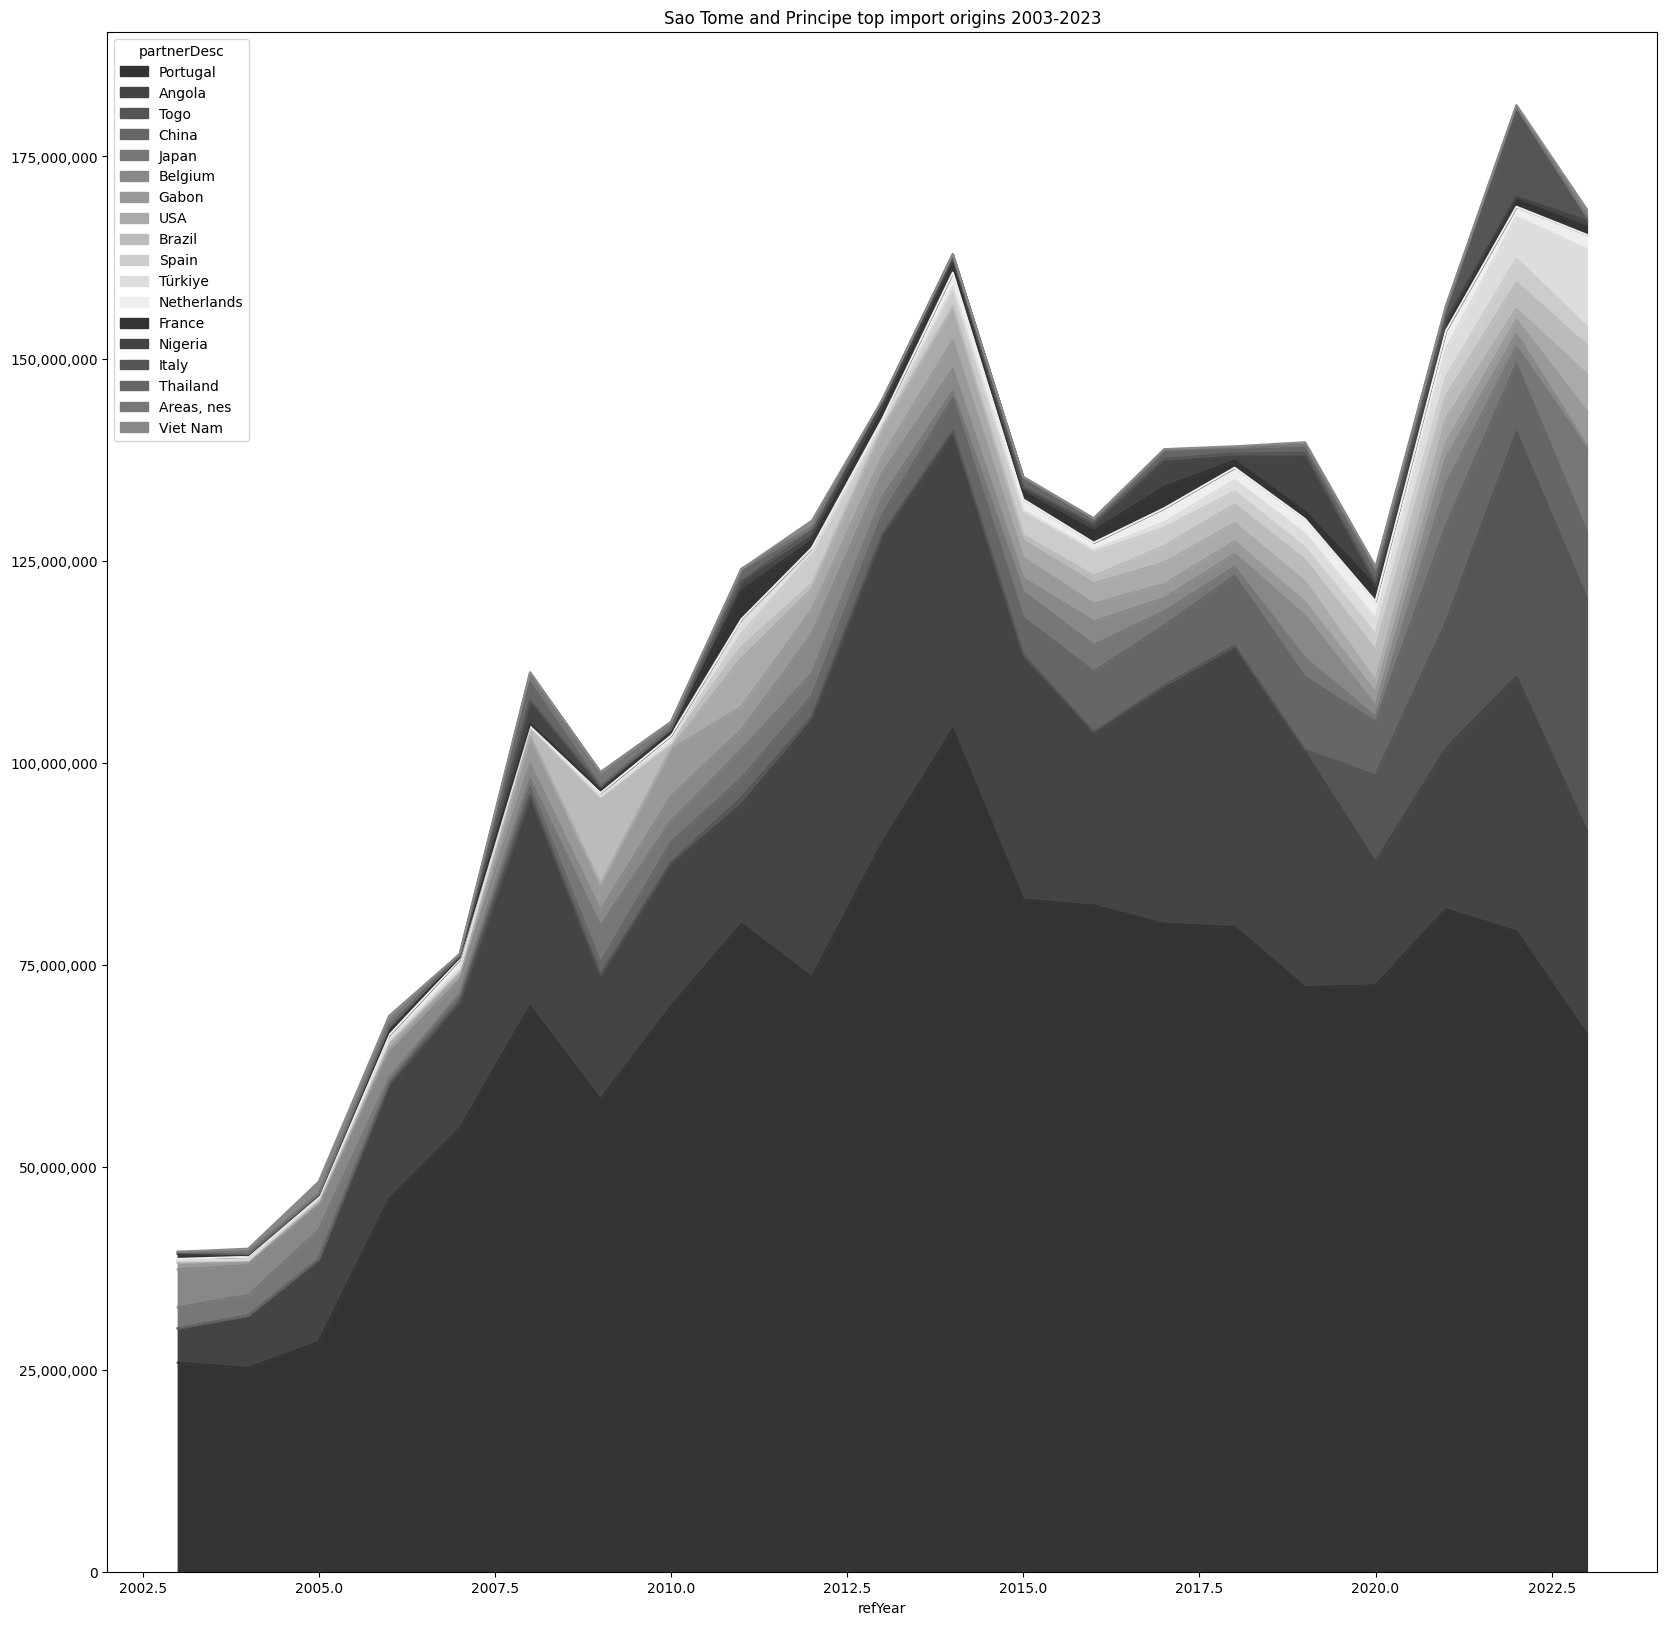

In [ ]:
import matplotlib.pyplot as plt

title=f"{country_of_interest_name} top import origins {start_year}-{end_year}"
plotfile = f"reports/{country_of_interest_name}_3.1.4_import_partners_{start_year}-{end_year}.png"

# colors = ['red','lightsalmon','green','lightgreen','darkviolet','violet','blue','dodgerblue','orange','yellow','brown','black','grey','pink','cyan','magenta',]
# colors = ['crimson', 'darkorange', 'gold', 'limegreen', 'mediumseagreen', 'teal', 'deepskyblue', 'royalblue', 'indigo', 'mediumvioletred', 'hotpink', 'saddlebrown', 'grey', 'black', 'darkslategrey', 'darkkhaki']
colors = [ '#333333','#444444', '#555555', '#666666', '#777777', '#888888', '#999999', '#AAAAAA', '#BBBBBB', '#CCCCCC', '#DDDDDD', '#EEEEEE']
fig2 = values_only.plot.area(figsize=(20,20),title=title, color=colors)

for i, line in enumerate(fig2.get_lines()):
    n = i % len(colors)
    # print(i, line, colors[n])
    line.set_color(colors[n])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig2.yaxis.set_major_formatter(formatter)

plt.savefig(plotfile)
plt.show()

In [ ]:
plotfile

'reports/Sao Tome and Principe_3.1.4_import_partners_2003-2023.png'

In [ ]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_import_partners]
list(show_only_columns)

[('partner_perc', 'Angola'),
 ('partner_perc', 'Areas, nes'),
 ('partner_perc', 'Belgium'),
 ('partner_perc', 'Brazil'),
 ('partner_perc', 'China'),
 ('partner_perc', 'France'),
 ('partner_perc', 'Gabon'),
 ('partner_perc', 'Italy'),
 ('partner_perc', 'Japan'),
 ('partner_perc', 'Netherlands'),
 ('partner_perc', 'Nigeria'),
 ('partner_perc', 'Portugal'),
 ('partner_perc', 'Spain'),
 ('partner_perc', 'Thailand'),
 ('partner_perc', 'Togo'),
 ('partner_perc', 'Türkiye'),
 ('partner_perc', 'USA'),
 ('partner_perc', 'Viet Nam'),
 ('primaryValue', 'Angola'),
 ('primaryValue', 'Areas, nes'),
 ('primaryValue', 'Belgium'),
 ('primaryValue', 'Brazil'),
 ('primaryValue', 'China'),
 ('primaryValue', 'France'),
 ('primaryValue', 'Gabon'),
 ('primaryValue', 'Italy'),
 ('primaryValue', 'Japan'),
 ('primaryValue', 'Netherlands'),
 ('primaryValue', 'Nigeria'),
 ('primaryValue', 'Portugal'),
 ('primaryValue', 'Spain'),
 ('primaryValue', 'Thailand'),
 ('primaryValue', 'Togo'),
 ('primaryValue', 'Türkiye'

#### Export to Excel

Table with the top import origins for the period of interest

In [ ]:
top_partners_file = f'reports/{country_of_interest_name}_3.1.1_top_import_partners.xlsx'
top_partners_cols_file = f'reports/{country_of_interest_name}_3.1.2_top_import_partners_cols.xlsx'
import_top_partners_file = f'reports/{country_of_interest_name}_3.1.3_import_top_{show_only_top}_partners_{start_year}-{end_year}.xlsx'

imports[cols].sort_values(['refYear','flowCode','partner_rank']).to_excel(top_partners_file)
pivoted.to_excel(top_partners_cols_file)
pivoted[show_only_columns].reset_index().to_excel(import_top_partners_file)

print(f"Top import partners file: {top_partners_file}")
print(f"Top import partners cols file: {top_partners_cols_file}")
print(f"Import top partners file: {import_top_partners_file}")

Top import partners file: reports/Sao Tome and Principe_3.1.1_top_import_partners.xlsx
Top import partners cols file: reports/Sao Tome and Principe_3.1.2_top_import_partners_cols.xlsx
Import top partners file: reports/Sao Tome and Principe_3.1.3_import_top_5_partners_2003-2023.xlsx


### 3.2 Imports: products

#### Main imported products

In [ ]:
import pandas as pd

# show 500 lines of dataframes
pd.set_option('display.max_rows', 500)

show_only_top=5
# years_of_interest = comtrade.year_range(2020, 2021)

print(country_of_interest_name, years_of_interest)


Sao Tome and Principe 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


Get the products imported by country of interest

In [ ]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = symmetric_reporting  # keep previous choice for consistency
if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'

In [ ]:
import comtradetools

clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World bank uses AG6
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )
df.info()

INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalData for period 2014
INFO:root:Calling getFinalData for period 2015
INFO:root:Calling getFinalData for period 2016
INFO:root:Calling getFinalData for period 2017
INFO:root:Calling getFinalData for period 2018
INFO:root:Calling getFinalData for period 2019
INFO:root:Calling getFinalData for period 2020
INFO:root:Calling getFinalData for period 2021
INFO:root:Calling getFinalData for period 2022
INFO:root:Calling getFinalData for period 2023
<class 'panda

In [ ]:
print("Years available in the data:", list(df.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [ ]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20030101,2003,52,2003,678,STP,Sao Tome and Principe,M,...,"47,554.00",False,NaN,False,"27,976.00",NaN,"27,976.00",2,False,False
1,C,A,20030101,2003,52,2003,678,STP,Sao Tome and Principe,M,...,"17,301.00",False,NaN,False,"13,392.00",NaN,"13,392.00",0,False,False
2,C,A,20030101,2003,52,2003,678,STP,Sao Tome and Principe,M,...,"3,044.00",False,NaN,False,"2,941.00",NaN,"2,941.00",0,False,False
3,C,A,20030101,2003,52,2003,678,STP,Sao Tome and Principe,M,...,"13,547.00",False,NaN,False,"12,827.00",NaN,"12,827.00",0,False,False
4,C,A,20030101,2003,52,2003,678,STP,Sao Tome and Principe,M,...,195.00,False,NaN,False,394.00,NaN,394.00,0,False,False


Agreggate by product, keep the top products imported each year

In [ ]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
imports = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode'],'primaryValue','product',drop_duplicates=True)
imports = imports[imports['product_rank']<=show_only_top]
imports.info()

cols=['refYear','flowCode','product_rank','cmdCode', 'cmdDesc','product_sum','product_upper_perc','classificationCode','aggrLevel','isLeaf', 'product_upper_sum']
formats =  comtradetools.make_format(cols)

top_import_products_codes = imports['cmdCode'].unique()

print(f"Top products imported by {country_of_interest_name} in {years_of_interest}:\n {top_import_products_codes}")
for cmdCode in top_import_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")
imports[cols].sort_values(['refYear','flowCode','product_rank']).head(10).style.format(formats)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 77 to 151823
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  105 non-null    object 
 1   freqCode                  105 non-null    object 
 2   refPeriodId               105 non-null    int64  
 3   refYear                   105 non-null    int64  
 4   refMonth                  105 non-null    int64  
 5   period                    105 non-null    object 
 6   reporterCode              105 non-null    int64  
 7   reporterISO               105 non-null    object 
 8   reporterDesc              105 non-null    object 
 9   flowCode                  105 non-null    object 
 10  flowDesc                  105 non-null    object 
 11  partnerCode               105 non-null    int64  
 12  partnerISO                105 non-null    object 
 13  partnerDesc               105 non-null    object 
 14  partne

,refYear,flowCode,product_rank,cmdCode,cmdDesc,product_sum,product_upper_perc,classificationCode,aggrLevel,isLeaf,product_upper_sum
125,2003,M,1,271000,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.s., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals","$8,448,409",10.345%,H1,6,True,"$81,667,164"
77,2003,M,2,220421,"Wine; still, in containers holding 2 litres or less","$4,490,806",5.499%,H1,6,True,"$81,667,164"
116,2003,M,3,252329,"Cement; portland, other than white, whether or not artificially coloured","$3,139,656",3.844%,H1,6,True,"$81,667,164"
162,2003,M,4,150790,"Vegetable oils; soya-bean oil and its fractions, other than crude, whether or not refined, but not chemically modified","$2,469,024",3.023%,H1,6,True,"$81,667,164"
189,2003,M,5,100620,Cereals; husked (brown) rice,"$2,453,809",3.005%,H1,6,True,"$81,667,164"
4974,2004,M,1,271000,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.s., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals","$12,044,422",14.535%,H1,6,True,"$82,867,571"
5086,2004,M,2,110100,Wheat or meslin flour,"$3,899,332",4.705%,H1,6,True,"$82,867,571"
5003,2004,M,3,220421,"Wine; still, in containers holding 2 litres or less","$3,643,374",4.397%,H1,6,True,"$82,867,571"
4978,2004,M,4,252329,"Cement; portland, other than white, whether or not artificially coloured","$3,227,832",3.895%,H1,6,True,"$82,867,571"
5088,2004,M,5,100620,Cereals; husked (brown) rice,"$2,641,714",3.188%,H1,6,True,"$82,867,571"


### Caveat

For Angola results match https://trendeconomy.com/data/h2/Angola/TOTAL for AG2 and AG4 but not https://www.statista.com/statistics/1143152/value-of-imports-into-angola-by-category/  and close but not same as https://globaledge.msu.edu/countries/angola/tradestats

The imports match World Bank Wits data mostly, but in some years 
there seems to be a mismatch of HS Codes, with different descriptions in Wits
and values that sometimes match AG4 and not AG6 (2015,total is AG4:2710 not AG6:271012 )
and in same cases match the first 5 digits (2015: 73042 "Casings tubing...", 2021 10011, Durum Wheat)

Use the following cell to compute totals for codes with first 5 digit in common to compare with other sources

In [ ]:
import pandas as pd

pd.set_option('display.max_colwidth', 200)
pd.options.display.float_format = '{:,.2f}'.format

code_prefix = '10011'
cols=['refYear','flowCode','product_rank','cmdCode','cmdDesc','primaryValue','product_perc']

# select rows and columns
selected_rows = df[(df['refYear']==2021) & (df['cmdCode'].str.startswith(code_prefix))][cols].sort_values(by=['primaryValue'],ascending=False).head(50)

# add total of primaryValue column
total = selected_rows['primaryValue'].sum()
selected_rows.loc['total'] = pd.Series({'primaryValue': total})

# display selected rows
selected_rows


,refYear,flowCode,product_rank,cmdCode,cmdDesc,primaryValue,product_perc
total,NaN,NaN,NaN,NaN,NaN,0.00,NaN


In [ ]:
print("Years available in the data:", list(imports.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


#### Export to Excel

In [ ]:
filename = f'reports/{country_of_interest_name}_3.2_imports_products_{clCode}-{cmdDetail}-{imports["refYear"].min()}-{imports["refYear"].max()}.xlsx'
print("Exporting to ",filename)
imports[cols].sort_values(['refYear','flowCode','product_rank']).to_excel(filename,index=False)

Exporting to  reports/Sao Tome and Principe_3.2_imports_products_HS-AG6-2003-2023.xlsx


### 3.3 Import partners / product analysis

Which are the partners selling the top imports by country of interest

In [ ]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = symmetric_reporting  # keep previous choice

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'

In [ ]:
import warnings
warnings.filterwarnings('default')

clCode = 'HS'
cmdDetail = 'AG6'  # not all countries report at higher detail

df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1, # lots of data, better segment
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )
df.info()

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43399 entries, 0 to 43398
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  43399 non-null  object 
 1   freqCode                  43399 non-null  object 
 2   refPeriodId               43399 non-null  int64  
 3   refYear                   43399 non-null  int64  
 4   refMonth                  43399 non-null  int64  
 5   period                    43399 non-null  object 
 6   reporterCode              43399 non-null  int64  
 7   reporterISO               43399 non-null  object 
 8   reporterDesc              43399 non-null  object 
 9   flowCode                  43399 non-null  object 
 10  flowDesc                  43399 non-null  object 
 11  partnerCode               43399 non-null  int64  
 12  partnerISO                43399 non-null  object 
 13  partnerDesc               43399 non-null  object 
 14  partne

In [ ]:
cols2=['refYear','flowCode','reporterDesc','partnerDesc','primaryValue','cmdCode','cmdDesc']
df[cols2].sample(10)

,refYear,flowCode,reporterDesc,partnerDesc,primaryValue,cmdCode,cmdDesc
127704,2020,M,Sao Tome and Principe,China,73.60,220210,"Waters; including mineral and aerated, containing added sugar or other sweetening matter or flavoured"
106755,2018,M,Sao Tome and Principe,Nigeria,837.47,853990,Lamps; parts of the lamps of heading no. 8539
113197,2019,M,Sao Tome and Principe,World,"1,119.82",930621,Ammunition; shotgun cartridges
9109,2005,M,Sao Tome and Principe,World,176.00,854150,"Electrical apparatus; photosensitive semiconductor devices n.e.s. in heading no. 8541, including photovoltaic cells, whether or not assembled in modules or made up into panels"
76280,2015,M,Sao Tome and Principe,Portugal,"1,172.00",240220,Cigarettes; containing tobacco
136361,2021,M,Sao Tome and Principe,China,"5,241.52",401699,"Rubber; vulcanised (other than hard rubber), articles n.e.c. in heading no. 4016, of non-cellular rubber"
16856,2006,M,Sao Tome and Principe,Portugal,137.00,961519,"Combs, hair slides and the like; of other than hard rubber or plastics"
15703,2006,M,Sao Tome and Principe,Portugal,"1,842.00",441830,Wood; parquet panels
1095,2003,M,Sao Tome and Principe,World,179.00,820590,"Tools, hand; sets, of articles of two or more of the foregoing items"
105788,2018,M,Sao Tome and Principe,Czechia,66.04,731029,"Tanks, casks, drums, boxes and similar containers for any material (excluding compressed or liquefied gas) less than 50l capacity, n.e.c. in item no. 7310.2, of iron or steel"


In [ ]:
df.refYear.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

Aggregate by partner and keep the main ones

In [ ]:
import pandas as pd
import comtradetools
import warnings

# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5   # change to have more top partners

print(f"Top products imported by {country_of_interest_name} in {years_of_interest}:\n {top_import_products_codes}")
for cmdCode in top_import_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")

print(f"Top import partners ({len(top_import_partners)}): {top_import_partners}")
prefix='cmd_partner'
# remove world
if 0 in df[f'{partner_column}Code'].unique():
    warnings.warn("Removing world from data")
    df = df[df[f'{partner_column}Code']!=0]

products_and_partners = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode',f'{partner_column}Code'],'primaryValue',prefix,drop_duplicates=True)
cols=['refYear','flowCode','cmdDesc','cmdCode',f'{partner_column}Desc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats=comtradetools.make_format(cols)

products_and_partners=products_and_partners[(products_and_partners['cmdCode'].isin(top_import_products_codes)
                        & (products_and_partners[f'{prefix}_rank']<=show_only_top))]
print(f"Data available for years {products_and_partners.refYear.unique()}")


Top products imported by Sao Tome and Principe in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['220421' '252329' '271000' '150790' '100620' '110100' '870321' '220300'
 '850213' '170199' '871120' '271011' '100630' '020714' '691110' '999999'
 '850211' '220290' '490700' '732619' '271019']
   220421: Wine; still, in containers holding 2 litres or less
   252329: Cement; portland, other than white, whether or not artificially coloured
   271000: 271000
   150790: Vegetable oils; soya-bean oil and its fractions, other than crude, whether or not refined, but not chemically modified
   100620: Cereals; husked (brown) rice
   110100: Wheat or meslin flour
   870321: Vehicles; with only spark-ignition internal combustion piston engine, cylinder capacity not over 1000cc
   220300: Beer; made from malt
   850213: Electric generating sets; with compression-ignition internal combustion piston engines (diesel or semi-diesel engines), of a

/var/folders/bc/41rz3hqn5335_y1tbvy1w2_w0000gp/T/ipykernel_10830/890561552.py:19: UserWarning: Removing world from data
  warnings.warn("Removing world from data")


Data available for years [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023]


### Partners for main import products

In [ ]:
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                        ascending=[True,True,False,True])\
                                            .head(30).style.format(formats) #.hide(axis='index')

,refYear,flowCode,cmdDesc,cmdCode,partnerDesc,cmd_partner_rank,cmd_partner_sum,cmd_partner_perc,cmd_partner_upper_sum
1795,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.s., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals",271000,Angola,1,"$4,086,571",96.742%,"$4,224,205"
3309,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.s., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals",271000,Portugal,2,"$132,000",3.125%,"$4,224,205"
2741,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.s., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals",271000,Japan,3,"$1,505",0.036%,"$4,224,205"
4784,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.s., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals",271000,South Africa,4,"$1,435",0.034%,"$4,224,205"
2504,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.s., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals",271000,Gabon,5,"$1,397",0.033%,"$4,224,205"
3269,2003,M,"Wine; still, in containers holding 2 litres or less",220421,Portugal,1,"$2,191,571",97.603%,"$2,245,403"
4777,2003,M,"Wine; still, in containers holding 2 litres or less",220421,South Africa,2,"$12,638",0.563%,"$2,245,403"
2123,2003,M,"Wine; still, in containers holding 2 litres or less",220421,Belgium,3,"$8,984",0.400%,"$2,245,403"
2800,2003,M,"Wine; still, in containers holding 2 litres or less",220421,Netherlands,4,"$8,588",0.382%,"$2,245,403"
2329,2003,M,"Wine; still, in containers holding 2 litres or less",220421,France,5,"$8,446",0.376%,"$2,245,403"


In [ ]:
filename = f'reports/{country_of_interest_name}_3.3_imports_products_partners_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'
print("Exporting to ",filename)
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                        ascending=[True,True,False,True]).to_excel(filename, index=False)

Exporting to  reports/Sao Tome and Principe_3.3_imports_products_partners_HS-AG6-2003-2023.xlsx


### 3.4 Main partners and main products imported by country of interest

Detail of the main products by import partner.

Allows to analyse the mix of products of the main suppliers from this country.



In [ ]:
top_import_partners

array(['Angola', 'Belgium', 'Gabon', 'Japan', 'Portugal', 'Viet Nam',
       'Areas, nes', 'Netherlands', 'Nigeria', 'Thailand', 'Brazil',
       'France', 'USA', 'Spain', 'China', 'Togo', 'Italy', 'Türkiye'],
      dtype=object)

In [ ]:
import comtradetools

show_only_top = 5  # for suppliers with wide range of products e.g PT->AO increase

print(f"Top import partners ({len(top_import_partners)}): {top_import_partners}")
prefix='partner_cmd'
suppliers_and_products = comtradetools.total_rank_perc(df,['refYear','flowCode',f'{partner_column}Code','cmdCode'],'primaryValue',prefix,drop_duplicates=False)

cols=['refYear','flowCode',f'{partner_column}Desc',f'{prefix}_rank','cmdCode','cmdDesc',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats = comtradetools.make_format(cols)
suppliers_and_products=suppliers_and_products[(suppliers_and_products[f'{partner_column}Desc'].isin(top_import_partners)
                       & (suppliers_and_products[f'{prefix}_rank']<=show_only_top))]

print("First rows")
suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).head(10).style.format(formats).hide(axis='index')

Top import partners (18): ['Angola' 'Belgium' 'Gabon' 'Japan' 'Portugal' 'Viet Nam' 'Areas, nes'
 'Netherlands' 'Nigeria' 'Thailand' 'Brazil' 'France' 'USA' 'Spain'
 'China' 'Togo' 'Italy' 'Türkiye']
First rows


refYear,flowCode,partnerDesc,partner_cmd_rank,cmdCode,cmdDesc,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2003,M,Portugal,1,220421,"Wine; still, in containers holding 2 litres or less","$2,191,571",8.481%,"$25,839,469"
2003,M,Portugal,2,252329,"Cement; portland, other than white, whether or not artificially coloured","$1,253,255",4.850%,"$25,839,469"
2003,M,Portugal,3,220300,Beer; made from malt,"$1,200,754",4.647%,"$25,839,469"
2003,M,Portugal,4,150790,"Vegetable oils; soya-bean oil and its fractions, other than crude, whether or not refined, but not chemically modified","$970,095",3.754%,"$25,839,469"
2003,M,Portugal,5,870321,"Vehicles; spark-ignition internal combustion reciprocating piston engine, cylinder capacity not exceeding 1000cc","$578,414",2.238%,"$25,839,469"
2003,M,Belgium,1,110100,Wheat or meslin flour,"$682,371",14.587%,"$4,677,844"
2003,M,Belgium,2,170111,"Sugars; cane sugar, raw, in solid form, not containing added flavouring or colouring matter","$462,770",9.893%,"$4,677,844"
2003,M,Belgium,3,040221,"Dairy produce; milk and cream, concentrated, not containing added sugar or other sweetening matter, in powder, granules or other solid forms, of a fat content exceeding 1.5% (by weight)","$367,252",7.851%,"$4,677,844"
2003,M,Belgium,4,150790,"Vegetable oils; soya-bean oil and its fractions, other than crude, whether or not refined, but not chemically modified","$262,772",5.617%,"$4,677,844"
2003,M,Belgium,5,630900,"Clothing; worn, and other worn articles","$230,759",4.933%,"$4,677,844"


Last rows

In [ ]:

suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).tail(10).style.format(formats).hide(axis='index')

refYear,flowCode,partnerDesc,partner_cmd_rank,cmdCode,cmdDesc,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2023,M,Thailand,4,970190,Artwork; collages and similar decorative plaques,"$1,293",0.252%,"$513,817"
2023,M,Thailand,5,490110,"Printed matter; in single sheets, whether or not folded","$1,182",0.230%,"$513,817"
2023,M,Belgium,1,020714,"Meat and edible offal; of fowls of the species Gallus domesticus, cuts and offal, frozen","$156,149",41.198%,"$379,022"
2023,M,Belgium,2,040120,"Dairy produce; milk and cream, not concentrated, not containing added sugar or other sweetening matter, of a fat content, by weight, exceeding 1% but not exceeding 6%","$67,387",17.779%,"$379,022"
2023,M,Belgium,3,070310,"Vegetables, alliaceous; onions and shallots, fresh or chilled","$58,035",15.312%,"$379,022"
2023,M,Belgium,4,630900,"Clothing; worn, and other worn articles","$55,602",14.670%,"$379,022"
2023,M,Belgium,5,040690,"Dairy produce; cheese (not grated, powdered or processed), n.e.c. in heading no. 0406","$7,890",2.082%,"$379,022"
2023,M,Italy,1,160250,"Meat preparations; of bovine animals, meat or meat offal, prepared or preserved (excluding livers and homogenised preparations)","$16,302",97.905%,"$16,651"
2023,M,Italy,2,848420,Seals; mechanical,$266,1.600%,"$16,651"
2023,M,Italy,3,870899,Vehicle parts and accessories; n.e.c. in heading no. 8708,$82,0.495%,"$16,651"


#### Export to Excel

In [ ]:
filename = f'reports/{country_of_interest_name}_3.4_imports_partners_products_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'

suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).to_excel(filename, index=False)

print("Exporting to ",filename)

Exporting to  reports/Sao Tome and Principe_3.4_imports_partners_products_HS-AG6-2003-2023.xlsx


### 3.5 Get the alternative clients for country of interest suppliers

For each year, supplier, imported commodity, fetch all the 
exports of the commodity by the supplier to other countries, and
compute the ranking of country of interest among the clients
of partner for that commodity.

Country of interest: Angola, in 2022 Argentina was #1 supplier of Angola for commodity
code 100119 "Cereals; wheat and meslin, durum wheat, other than seed"; fetch all the clients of Argentina for 100119 and compute the ranking of Angola.

First step is to get the combos os partner and commodity.



In [ ]:
top_import_products_codes

array(['220421', '252329', '271000', '150790', '100620', '110100',
       '870321', '220300', '850213', '170199', '871120', '271011',
       '100630', '020714', '691110', '999999', '850211', '220290',
       '490700', '732619', '271019'], dtype=object)

In [ ]:
combos_of_interest = suppliers_and_products[(suppliers_and_products['cmdCode'].isin(top_import_products_codes)
                & (suppliers_and_products[f'{partner_column}Code'].isin(top_import_partners_codes)))][[f'{partner_column}Code','cmdCode']].drop_duplicates()
combos_of_interest = [tuple(x) for x in combos_of_interest.values]
len(combos_of_interest)

110

In [ ]:
# create lists of commodities codes and country codes to query comtrade
cmdCode_list = [cmdCode for (countryCode,cmdCode) in combos_of_interest]
cmdCode_list = list(set(cmdCode_list))
countryCode_list = [countryCode for (countryCode,cmdCode) in combos_of_interest]
countryCode_list = list(set(countryCode_list))
cmdCodeCSV = ','.join(cmdCode_list)
countryCodeCSV = ','.join(map(str,countryCode_list))

Get the all clients of suppliers for the products imported by country of interest

In [ ]:
print("Years of interest: ", years_of_interest)
print("countryCodeCSV: ", countryCodeCSV)
print("cmdCodeCSV: ", cmdCodeCSV)

df = comtradetools.getFinalData(APIKEY,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode='X',
                                reporterCode=countryCodeCSV,
                                partnerCode=None,
                                remove_world=True,
                                partner2Code=0,
                                period=years_of_interest,
                                period_size=1,
                                clCode=clCode,
                                cmdCode=cmdCodeCSV,  # Top level product types
                                motCode=0,  # all means of transport
                                customsCode='C00',
                                includeDesc=True,
                                retry_if_empty=False,
                                cache=True,

                                )

Years of interest:  2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
countryCodeCSV:  768,704,899,764,392,266,842,76,620,528,792,724,566,24,380,56,251,156
cmdCodeCSV:  850211,150790,110100,271000,170199,220300,020714,220421,999999,100630,850213,100620,220290,252329,691110,871120,490700,870321,271019,271011
INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalData for period 2014
INFO:root:Calling getFinalData for period 2015
INFO:root:Calling getFina

Countries also buying top imports of country of interest from the same suppliers

In [ ]:
list(df.reporterDesc.unique()), list(df.partnerDesc.unique())


(['Belgium',
  'Brazil',
  'China',
  'Gabon',
  'France',
  'Italy',
  'Japan',
  'Portugal',
  'Nigeria',
  'Netherlands',
  'Viet Nam',
  'Spain',
  'Togo',
  'Thailand',
  'Türkiye',
  'USA',
  'Angola'],
 ['Albania',
  'Antarctica',
  'Algeria',
  'Angola',
  'Antigua and Barbuda',
  'Azerbaijan',
  'Argentina',
  'Australia',
  'Austria',
  'Bahrain',
  'Bangladesh',
  'Barbados',
  'Bermuda',
  'Armenia',
  'Bolivia (Plurinational State of)',
  'Botswana',
  'Bosnia Herzegovina',
  'Brazil',
  'Belize',
  'Solomon Isds',
  'Brunei Darussalam',
  'Bulgaria',
  'Burundi',
  'Belarus',
  'Cameroon',
  'Canada',
  'Central African Rep.',
  'Sri Lanka',
  'Chad',
  'Chile',
  'China',
  'Colombia',
  'Comoros',
  'Mayotte (Overseas France)',
  'Congo',
  'Dem. Rep. of the Congo',
  'Costa Rica',
  'Croatia',
  'Cuba',
  'Cyprus',
  'Czechia',
  'Benin',
  'Denmark',
  'Dominica',
  'Dominican Rep.',
  'El Salvador',
  'Ecuador',
  'Equatorial Guinea',
  'Ethiopia',
  'Eritrea',
  'Es

### Ranking of country of interest in the costumers of main suppliers
Allows assessment of the importance of country of interest for the partners
that are selling its main imports.

It allows for restricting rank, avoiding irrelevant matchess

For each supplier show the top costumers of the products bought by country of interest. 

If country of interest is not in the top five constumers, show position anyway if it is a supplier in the given year 

In [ ]:
import pandas as pd
import comtradetools

#  set max rows to 500
pd.set_option('display.max_rows', 1500)


other_costumers = comtradetools.total_rank_perc(
                                        df,
                                        groupby=['refYear','flowCode','reporterCode','cmdCode','partnerCode'],
                                        col='primaryValue',
                                        prefix='cmd_partner',
                                        )

other_costumers = other_costumers[other_costumers[['reporterCode','cmdCode']].apply(tuple,axis=1).isin(combos_of_interest)]
cols=['reporterDesc','cmdCode','cmdDesc','refYear','partnerDesc','cmd_partner_rank','primaryValue','cmd_partner_perc','cmd_partner_upper_sum']
formats =  comtradetools.make_format(cols)

other_costumers[(other_costumers['partnerCode'] == country_of_interest)
                | (other_costumers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).head(20).style.format(formats).hide(axis="index")

reporterDesc,cmdCode,cmdDesc,refYear,partnerDesc,cmd_partner_rank,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Angola,220290,"Non-alcoholic beverages; n.e.c. in item no. 2202.10, not including fruit or vegetable juices of heading no. 2009",2015,Congo,1,"$122,745",59.274%,"$207,080"
Angola,220290,"Non-alcoholic beverages; n.e.c. in item no. 2202.10, not including fruit or vegetable juices of heading no. 2009",2015,Namibia,2,"$30,860",14.902%,"$207,080"
Angola,220290,"Non-alcoholic beverages; n.e.c. in item no. 2202.10, not including fruit or vegetable juices of heading no. 2009",2015,Dem. Rep. of the Congo,3,"$21,505",10.385%,"$207,080"
Angola,220290,"Non-alcoholic beverages; n.e.c. in item no. 2202.10, not including fruit or vegetable juices of heading no. 2009",2015,China,4,"$15,892",7.674%,"$207,080"
Angola,220290,"Non-alcoholic beverages; n.e.c. in item no. 2202.10, not including fruit or vegetable juices of heading no. 2009",2015,Sao Tome and Principe,5,"$4,848",2.341%,"$207,080"
Angola,220290,"Non-alcoholic beverages; n.e.c. in item no. 2202.10, not including fruit or vegetable juices of heading no. 2009",2016,Dem. Rep. of the Congo,1,"$9,771,356",78.909%,"$12,383,082"
Angola,220290,"Non-alcoholic beverages; n.e.c. in item no. 2202.10, not including fruit or vegetable juices of heading no. 2009",2016,Congo,2,"$2,337,200",18.874%,"$12,383,082"
Angola,220290,"Non-alcoholic beverages; n.e.c. in item no. 2202.10, not including fruit or vegetable juices of heading no. 2009",2016,Namibia,3,"$206,629",1.669%,"$12,383,082"
Angola,220290,"Non-alcoholic beverages; n.e.c. in item no. 2202.10, not including fruit or vegetable juices of heading no. 2009",2016,Portugal,4,"$32,507",0.263%,"$12,383,082"
Angola,220290,"Non-alcoholic beverages; n.e.c. in item no. 2202.10, not including fruit or vegetable juices of heading no. 2009",2016,China,5,"$32,266",0.261%,"$12,383,082"


In [ ]:
ignore_if_rank_is_higher = 25

relevant_for_partner_exports=other_costumers[
    (other_costumers['partnerCode'] == country_of_interest) &
    (other_costumers['cmd_partner_rank'] < ignore_if_rank_is_higher)
][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank'])
relevant_for_partner_exports.head(10).style.format(formats).hide(axis='index')

reporterDesc,cmdCode,cmdDesc,refYear,partnerDesc,cmd_partner_rank,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Angola,220290,"Non-alcoholic beverages; n.e.c. in item no. 2202.10, not including fruit or vegetable juices of heading no. 2009",2015,Sao Tome and Principe,5,"$4,848",2.341%,"$207,080"
Angola,252329,"Cement; portland, other than white, whether or not artificially coloured",2015,Sao Tome and Principe,2,"$127,713",0.645%,"$19,811,808"
Angola,252329,"Cement; portland, other than white, whether or not artificially coloured",2016,Sao Tome and Principe,2,"$830,048",1.469%,"$56,504,423"
Angola,252329,"Cement; portland, other than white, whether or not artificially coloured",2017,Sao Tome and Principe,2,"$1,405,682",18.535%,"$7,584,129"
Angola,252329,"Cement; portland, other than white, whether or not artificially coloured",2018,Sao Tome and Principe,1,"$2,788,120",96.813%,"$2,879,904"
Angola,252329,"Cement; portland, other than white, whether or not artificially coloured",2019,Sao Tome and Principe,2,"$1,418,169",26.220%,"$5,408,753"
Angola,252329,"Cement; portland, other than white, whether or not artificially coloured",2020,Sao Tome and Principe,1,"$2,173,068",68.074%,"$3,192,210"
Angola,252329,"Cement; portland, other than white, whether or not artificially coloured",2021,Sao Tome and Principe,1,"$1,683,282",50.182%,"$3,354,383"
Angola,252329,"Cement; portland, other than white, whether or not artificially coloured",2022,Sao Tome and Principe,1,"$1,854,333",52.984%,"$3,499,773"
Angola,871120,"Motorcycles (including mopeds) and cycles; fitted with an auxiliary motor, reciprocating internal combustion piston engine, of cylinder capacity exceeding 50cc but not exceeding 250cc, with or without side-cars; side-cars",2015,Sao Tome and Principe,6,$972,0.240%,"$405,699"


#### Export to Excel


In [ ]:
filename = filename = f'reports/{country_of_interest_name}_3.5.1_import_partners_alternative.xlsx'

other_costumers[(other_costumers['partnerCode'] == country_of_interest)
                | (other_costumers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Sao Tome and Principe_3.5.1_import_partners_alternative.xlsx


In [ ]:
filename = f'reports/{country_of_interest_name}_3.5.2_import_partners_alternative_relevant.xlsx'

relevant_for_partner_exports.to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Sao Tome and Principe_3.5.2_import_partners_alternative_relevant.xlsx


In [ ]:
from datetime import datetime

current_datetime = datetime.now()
print(f"End run for {country_of_interest_name}:", current_datetime)

End run for Sao Tome and Principe: 2024-06-20 18:04:11.471346


In [463]:
"Done"

'Done'